# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [7]:
%load_ext autoreload
%aimport agent, models

In [8]:
!pip -q install ./python

ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.21 which is incompatible.


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [9]:
from unityagents import UnityEnvironment
import numpy as np
from workspace_utils import active_session

# select this option to load version 1 (with a single agent) of the environment
env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
# env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [10]:
import agent

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [11]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [12]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726671e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


In [13]:
a = agent.Agent(state_size, action_size)
a.TAU

0.05

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [14]:
# Udacity provided starter code
'''env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
iteration = 0
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    print("\t", actions)
    print("\t", type(actions))
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    if rewards[0] != 0:
        print("rewards", rewards)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        print(iteration)
        break
    iteration += 1
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))
'''

'env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    \nstates = env_info.vector_observations                  # get the current state (for each agent)\nscores = np.zeros(num_agents)                          # initialize the score (for each agent)\niteration = 0\nwhile True:\n    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)\n    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1\n    print("\t", actions)\n    print("\t", type(actions))\n    env_info = env.step(actions)[brain_name]           # send all actions to tne environment\n    next_states = env_info.vector_observations         # get next state (for each agent)\n    rewards = env_info.rewards                         # get reward (for each agent)\n    if rewards[0] != 0:\n        print("rewards", rewards)\n    dones = env_info.local_done                        # see if episode finished\n    scores += env_info.rewards               

In [15]:
import queue
from collections import deque

# parameters
print_every = 50
# seems to be 1000 for the env anyway
max_ts = 1000
max_episodes = 300

curr_agent = agent.Agent(state_size, action_size)

# can't use a queue.Queue because "Insertion will block once this size has been reached, until queue items are consumed"
scores = deque(maxlen=100)                          # initialize the score (for each agent)
scores_history = []


episode_won_i = 0

with active_session():
    for i in range(max_episodes):
        # initialize for the start of the episode
        env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
        state = env_info.vector_observations[0]                  # get the current state (for each agent)
        # resets the noise class variable
        curr_agent.reset()
        score = 0
        
        for t in range(max_ts):
            action = curr_agent.act(state.astype('float32', copy=False))
            
            # env_info's variables are lists- get single list item- train with that
            # in case env.step expects a nested list like in above sample code, send [[num1, num2, num3, num4]] (adding the outer dim)
            env_info = env.step(np.expand_dims(action, axis=0))[brain_name]
            reward = env_info.rewards[0]
            next_state = env_info.vector_observations[0]
            done = env_info.local_done[0]
            
            score = score + reward

            curr_agent.step(state, action, reward, next_state, done)
            state = next_state

            if done: 
                if t < 1000:
                    print("episode {} at {} ts; done reached".format(i, t))
                break
        scores_history.append(score)
        scores.append(score)
        if i % print_every == 0:
            print("episode {}; average score past 100 episodes: {}".format(i, np.mean(scores)))
        if np.mean(scores) >= 30:
            episode_won_i = i
            print("Solved in {} episodes".format(episode_won_i))
            curr_agent.save()
            break
            
    print(scores_history)
        
        

/home/workspace/agent.py:111: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.local_critic.parameters(), 1)


episode 0; average score past 100 episodes: 0.0
episode 50; average score past 100 episodes: 0.018431372137046327
episode 100; average score past 100 episodes: 0.1858999958448112
episode 150; average score past 100 episodes: 0.4639999896287918
episode 200; average score past 100 episodes: 0.4999999888241291
episode 250; average score past 100 episodes: 0.4492999899573624
episode 300; average score past 100 episodes: 0.49539998892694714
episode 350; average score past 100 episodes: 0.6017999865487218
episode 400; average score past 100 episodes: 0.6404999856837094
episode 450; average score past 100 episodes: 0.5463999877870083
episode 500; average score past 100 episodes: 0.6247999860346317
episode 550; average score past 100 episodes: 0.702199984304607
episode 600; average score past 100 episodes: 0.5311999881267547
episode 650; average score past 100 episodes: 0.4344999902881682
episode 700; average score past 100 episodes: 0.4910999890230596
episode 750; average score past 100 episo

In [16]:
# 10/26:
#scores_history = [0.19999999552965164, 1.2999999709427357, 0.7399999834597111, 1.0599999763071537, 0.8399999812245369, 0.8999999798834324, 0.5899999868124723, 0.9499999787658453, 0.1099999975413084, 0.1099999975413084, 0.2799999937415123, 0.5099999886006117, 0.0, 0.0, 0.0, 0.1699999962002039, 0.0, 0.2899999935179949, 1.9499999564141035, 0.14999999664723873, 0.6799999848008156, 0.35999999195337296, 0.6799999848008156, 0.7099999841302633, 0.5299999881535769, 0.7699999827891588, 0.5999999865889549, 0.47999998927116394, 0.29999999329447746, 0.8999999798834324, 0.789999982342124, 0.5399999879300594, 0.40999999083578587, 1.649999963119626, 0.5799999870359898, 0.909999979659915, 0.25999999418854713, 0.4399999901652336, 0.35999999195337296, 0.5899999868124723, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.11999999731779099, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05999999865889549, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.13999999687075615, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12999999709427357, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12999999709427357, 0.0, 0.0, 0.0, 0.0, 0.1699999962002039, 0.0, 0.09999999776482582, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09999999776482582, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.11999999731779099, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.13999999687075615, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.11999999731779099, 0.0, 0.13999999687075615, 0.11999999731779099, 0.0, 0.0, 0.0, 0.13999999687075615, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09999999776482582, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1599999964237213, 0.0, 0.14999999664723873, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04999999888241291, 0.0, 0.0, 0.0, 0.08999999798834324, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07999999821186066, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.17999999597668648, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12999999709427357, 0.0, 0.0, 0.08999999798834324, 0.0, 0.0, 0.0, 0.08999999798834324, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09999999776482582, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12999999709427357, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09999999776482582, 0.0, 0.0, 0.14999999664723873, 0.0, 0.0, 0.11999999731779099, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05999999865889549, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1599999964237213, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.019999999552965164, 0.0, 0.0, 0.1699999962002039, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12999999709427357, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07999999821186066, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03999999910593033, 0.0, 0.0]

In [17]:
# pen 1000 after fix break
#scores_history = [0.0, 0.0, 1.0199999772012234, 0.5199999883770943, 1.6699999626725912, 0.2699999939650297, 0.2199999950826168, 0.35999999195337296, 0.24999999441206455, 0.3999999910593033, 0.0, 0.5099999886006117, 0.6199999861419201, 0.7099999841302633, 0.46999998949468136, 0.4599999897181988, 0.20999999530613422, 0.6099999863654375, 0.2899999935179949, 1.4399999678134918, 1.0099999774247408, 0.06999999843537807, 0.4899999890476465, 0.9999999776482582, 0.5899999868124723, 0.5599999874830246, 0.8499999810010195, 0.3199999928474426, 1.2799999713897705, 0.19999999552965164, 0.20999999530613422, 0.24999999441206455, 0.47999998927116394, 1.1799999736249447, 0.6999999843537807, 0.029999999329447746, 0.669999985024333, 0.23999999463558197, 0.14999999664723873, 0.8699999805539846, 0.24999999441206455, 0.4599999897181988, 1.0199999772012234, 0.6999999843537807, 0.7099999841302633, 0.4399999901652336, 0.3199999928474426, 0.40999999083578587, 0.4599999897181988, 0.04999999888241291, 0.6299999859184027, 0.03999999910593033, 0.29999999329447746, 0.36999999172985554, 0.09999999776482582, 0.0, 0.1599999964237213, 1.2299999725073576, 1.1199999749660492, 1.6199999637901783, 0.3399999924004078, 0.9699999783188105, 0.7699999827891588, 0.3999999910593033, 0.04999999888241291, 0.4899999890476465, 0.29999999329447746, 0.18999999575316906, 0.3799999915063381, 0.789999982342124, 0.9199999794363976, 0.3499999921768904, 0.8699999805539846, 0.3999999910593033, 0.2699999939650297, 0.41999999061226845, 0.8499999810010195, 0.6299999859184027, 0.3399999924004078, 0.5399999879300594, 0.7099999841302633, 0.14999999664723873, 0.3499999921768904, 0.7199999839067459, 0.13999999687075615, 0.3299999926239252, 1.7799999602138996, 0.9599999785423279, 0.25999999418854713, 0.6899999845772982, 1.269999971613288, 0.40999999083578587, 0.9499999787658453, 0.8299999814480543, 0.20999999530613422, 0.2699999939650297, 0.40999999083578587, 0.3999999910593033, 0.19999999552965164, 1.1399999745190144, 0.24999999441206455, 0.5799999870359898, 0.5299999881535769, 0.6999999843537807, 0.3899999912828207, 0.3399999924004078, 0.909999979659915, 0.9299999792128801, 0.669999985024333, 1.389999968931079, 0.9999999776482582, 0.6199999861419201, 0.3999999910593033, 0.07999999821186066, 0.029999999329447746, 0.2299999948590994, 0.8599999807775021, 0.7699999827891588, 0.24999999441206455, 1.0499999765306711, 0.2899999935179949, 1.339999970048666, 0.8199999816715717, 1.0399999767541885, 0.3999999910593033, 0.5599999874830246, 0.8499999810010195, 0.979999978095293, 0.979999978095293, 0.0, 0.7599999830126762, 1.5899999644607306, 1.1399999745190144, 0.25999999418854713, 1.0099999774247408, 0.20999999530613422, 0.4999999888241291, 0.4599999897181988, 0.5599999874830246, 0.7599999830126762, 0.789999982342124, 0.11999999731779099, 0.3399999924004078, 0.3299999926239252, 0.8299999814480543, 0.7699999827891588, 0.4499999899417162, 0.9499999787658453, 0.669999985024333, 1.3699999693781137, 0.18999999575316906, 0.7099999841302633, 0.3199999928474426, 0.4999999888241291, 0.909999979659915, 0.40999999083578587, 0.3799999915063381, 0.46999998949468136, 0.2899999935179949, 0.5599999874830246, 0.29999999329447746, 0.7599999830126762, 0.9399999789893627, 0.35999999195337296, 0.3199999928474426, 0.42999999038875103, 1.029999976977706, 0.5699999872595072, 0.40999999083578587, 1.1599999740719795, 0.6299999859184027, 0.4499999899417162, 0.36999999172985554, 0.05999999865889549, 0.6199999861419201, 0.9599999785423279, 0.2199999950826168, 0.0, 0.7399999834597111, 0.07999999821186066, 0.13999999687075615, 0.5099999886006117, 0.2899999935179949, 0.0, 0.5399999879300594, 0.3799999915063381, 1.649999963119626, 0.8099999818950891, 0.3399999924004078, 0.3899999912828207, 0.25999999418854713, 0.5199999883770943, 0.7099999841302633, 0.24999999441206455, 1.5499999653548002, 0.2299999948590994, 0.3899999912828207, 0.18999999575316906, 0.3299999926239252, 0.47999998927116394, 0.3799999915063381, 1.4399999678134918, 0.8899999801069498, 0.2799999937415123, 0.09999999776482582, 0.6499999854713678, 0.46999998949468136, 0.0, 0.5099999886006117, 1.1599999740719795, 1.0199999772012234, 1.6199999637901783, 0.3899999912828207, 0.3899999912828207, 0.05999999865889549, 0.009999999776482582, 1.339999970048666, 0.5399999879300594, 0.24999999441206455, 0.8999999798834324, 0.6199999861419201, 0.9399999789893627, 0.4599999897181988, 0.36999999172985554, 0.2799999937415123, 1.1799999736249447, 0.1699999962002039, 0.2699999939650297, 0.5599999874830246, 1.6299999635666609, 0.8799999803304672, 1.2999999709427357, 0.2799999937415123, 0.8099999818950891, 0.5399999879300594, 1.1999999731779099, 0.6599999852478504, 0.7399999834597111, 0.46999998949468136, 1.0699999760836363, 0.5799999870359898, 0.04999999888241291, 1.2499999720603228, 0.9299999792128801, 0.17999999597668648, 0.7999999821186066, 0.7199999839067459, 0.40999999083578587, 1.4499999675899744, 0.8599999807775021, 0.12999999709427357, 0.6499999854713678, 0.7199999839067459, 0.7699999827891588, 0.0, 0.0, 0.1599999964237213, 0.4899999890476465, 0.4999999888241291, 0.789999982342124, 0.7699999827891588, 0.1599999964237213, 0.6199999861419201, 1.0399999767541885, 0.3899999912828207, 0.789999982342124, 1.2099999729543924, 0.6499999854713678, 0.7499999832361937, 0.2699999939650297, 0.11999999731779099, 1.0899999756366014, 0.4399999901652336, 0.3799999915063381, 0.19999999552965164, 1.1599999740719795, 1.6899999622255564, 0.7499999832361937, 0.9399999789893627, 0.2799999937415123, 0.1599999964237213, 0.36999999172985554, 0.20999999530613422, 0.19999999552965164, 0.46999998949468136, 0.5599999874830246, 0.30999999307096004, 0.9599999785423279, 0.30999999307096004, 0.6299999859184027, 0.7799999825656414, 0.17999999597668648, 0.1099999975413084, 1.3599999696016312, 0.5199999883770943, 0.0, 0.6399999856948853, 1.6099999640136957, 0.979999978095293, 0.6499999854713678, 1.4499999675899744, 0.17999999597668648, 0.8499999810010195, 0.9699999783188105, 0.4999999888241291, 0.5599999874830246, 0.2199999950826168, 0.11999999731779099, 0.8899999801069498, 0.6099999863654375, 0.7399999834597111, 0.5799999870359898, 0.3999999910593033, 0.2699999939650297, 0.9499999787658453, 1.2599999718368053, 0.7399999834597111, 0.24999999441206455, 0.24999999441206455, 0.2799999937415123, 0.1099999975413084, 0.36999999172985554, 0.6899999845772982, 1.2999999709427357, 1.2499999720603228, 0.669999985024333, 0.2799999937415123, 0.11999999731779099, 0.36999999172985554, 0.5799999870359898, 0.9199999794363976, 1.4499999675899744, 1.2399999722838402, 0.0, 0.9599999785423279, 0.8599999807775021, 0.3999999910593033, 0.3999999910593033, 0.3899999912828207, 0.3299999926239252, 0.0, 0.18999999575316906, 0.8699999805539846, 0.29999999329447746, 0.41999999061226845, 0.46999998949468136, 0.6399999856948853, 0.07999999821186066, 0.5899999868124723, 0.9899999778717756, 0.3399999924004078, 0.2799999937415123, 0.7199999839067459, 0.7299999836832285, 0.6399999856948853, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08999999798834324, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.19999999552965164, 0.1099999975413084, 0.0, 0.0, 0.0, 0.19999999552965164, 0.0, 0.0, 0.1099999975413084, 0.1699999962002039, 0.0, 0.0, 0.0, 0.0, 0.11999999731779099, 0.0, 0.2299999948590994, 0.06999999843537807, 0.0, 0.05999999865889549, 0.0, 0.11999999731779099, 0.0, 0.0, 0.14999999664723873, 0.0, 0.19999999552965164, 0.14999999664723873, 0.08999999798834324, 0.03999999910593033, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07999999821186066, 0.0, 0.0, 0.0, 0.0, 0.0, 0.18999999575316906, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.36999999172985554, 0.25999999418854713, 0.0, 0.0, 0.2199999950826168, 0.1099999975413084, 0.1599999964237213, 0.0, 0.0, 0.19999999552965164, 0.20999999530613422, 0.3799999915063381, 0.14999999664723873, 0.25999999418854713, 0.3499999921768904, 0.12999999709427357, 0.0, 0.0, 0.14999999664723873, 0.35999999195337296, 0.0, 0.0, 0.0, 0.14999999664723873, 0.0, 0.0, 0.0, 0.1699999962002039, 0.0, 0.0, 0.0, 0.13999999687075615, 0.09999999776482582, 0.0, 0.1099999975413084, 0.0, 0.0, 0.0, 0.019999999552965164, 0.0, 0.0, 0.0, 0.24999999441206455, 0.0, 0.05999999865889549, 0.0, 0.0, 0.18999999575316906, 0.2699999939650297, 0.14999999664723873, 0.0, 0.0, 0.18999999575316906, 0.0, 0.0, 0.0, 0.0, 0.04999999888241291, 0.24999999441206455, 0.07999999821186066, 0.0, 0.24999999441206455, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1599999964237213, 0.0, 0.0, 0.04999999888241291, 0.0, 0.18999999575316906, 0.0, 0.0, 0.08999999798834324, 0.0, 0.0, 0.0, 0.0, 0.08999999798834324, 0.4399999901652336, 0.3299999926239252, 0.0, 0.0, 0.0, 0.1099999975413084, 0.0, 0.19999999552965164, 0.0, 0.13999999687075615, 0.0, 0.0, 0.0, 0.0, 0.4599999897181988, 0.0, 0.0, 0.0, 0.2299999948590994, 0.1599999964237213, 0.18999999575316906, 0.0, 0.0, 0.029999999329447746, 0.14999999664723873, 0.0, 0.0, 0.0, 0.0, 0.18999999575316906, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.019999999552965164, 0.2299999948590994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.13999999687075615, 0.24999999441206455, 0.0, 0.0, 0.03999999910593033, 0.0, 0.03999999910593033, 0.08999999798834324, 0.0, 0.0, 0.11999999731779099, 0.03999999910593033, 0.0, 0.0, 0.2199999950826168, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06999999843537807, 0.0, 0.0, 0.24999999441206455, 0.0, 0.0, 0.0, 0.1099999975413084, 0.12999999709427357, 0.0, 0.23999999463558197, 0.0, 0.0, 0.0, 0.1599999964237213, 0.0, 0.0, 0.08999999798834324, 0.1099999975413084, 0.17999999597668648, 0.04999999888241291, 0.0, 0.0, 0.25999999418854713, 0.41999999061226845, 0.04999999888241291, 0.0, 0.0, 0.0, 0.0, 0.04999999888241291, 0.14999999664723873, 0.09999999776482582, 0.0, 0.18999999575316906, 0.1599999964237213, 0.06999999843537807, 0.20999999530613422, 0.3499999921768904, 0.07999999821186066, 0.0, 0.2699999939650297, 0.0, 0.06999999843537807, 0.13999999687075615, 0.0, 0.0, 0.5899999868124723, 0.0, 0.0, 0.13999999687075615, 0.0, 0.07999999821186066, 0.0, 0.13999999687075615, 0.23999999463558197, 0.0, 0.0, 0.11999999731779099, 0.19999999552965164, 0.20999999530613422, 0.1599999964237213, 0.3399999924004078, 0.0, 0.6099999863654375, 0.0, 0.11999999731779099, 0.0, 0.0, 0.11999999731779099, 0.08999999798834324, 0.0, 0.0, 0.25999999418854713, 0.04999999888241291, 0.11999999731779099, 0.11999999731779099, 0.13999999687075615, 0.14999999664723873, 0.12999999709427357, 0.0, 0.3999999910593033, 0.08999999798834324, 0.0, 0.3199999928474426, 0.1599999964237213, 0.2699999939650297, 0.2699999939650297, 0.04999999888241291, 0.05999999865889549, 0.4999999888241291, 0.0, 0.36999999172985554, 0.04999999888241291, 0.0, 0.2899999935179949, 0.009999999776482582, 0.14999999664723873, 0.12999999709427357, 0.04999999888241291, 0.3199999928474426, 0.11999999731779099, 0.5599999874830246, 0.3799999915063381, 0.0, 0.0, 0.17999999597668648, 0.2799999937415123, 0.0, 0.12999999709427357, 0.5399999879300594, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.17999999597668648, 0.0, 0.4499999899417162, 0.0, 0.0, 0.0, 0.14999999664723873, 0.4999999888241291, 0.0, 0.0, 0.2199999950826168, 0.08999999798834324, 0.0, 0.0, 0.19999999552965164, 0.06999999843537807, 0.14999999664723873, 0.0, 0.0, 0.0, 0.0, 0.04999999888241291, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1599999964237213, 0.0, 0.669999985024333, 0.0, 0.18999999575316906, 0.4599999897181988, 0.18999999575316906, 0.12999999709427357, 0.07999999821186066, 0.03999999910593033, 0.4999999888241291, 0.1699999962002039, 0.18999999575316906, 0.9399999789893627, 0.09999999776482582, 0.09999999776482582, 0.13999999687075615, 0.36999999172985554, 0.5399999879300594, 0.4899999890476465, 0.0, 0.41999999061226845, 0.7599999830126762, 0.3899999912828207, 0.1099999975413084, 0.4599999897181988, 0.7299999836832285, 0.20999999530613422, 0.8199999816715717, 0.25999999418854713, 0.04999999888241291, 0.29999999329447746, 0.1599999964237213, 0.0, 0.0, 0.8799999803304672, 0.7199999839067459, 1.1799999736249447, 0.0, 0.0, 0.0, 0.36999999172985554, 0.9199999794363976, 0.2799999937415123, 0.4399999901652336, 0.549999987706542, 1.1999999731779099, 1.1199999749660492, 0.5099999886006117, 0.3299999926239252, 1.7799999602138996, 0.5199999883770943, 0.35999999195337296, 1.3299999702721834, 0.08999999798834324, 0.1699999962002039, 1.4299999680370092, 1.5199999660253525, 0.7699999827891588, 0.5999999865889549, 0.0, 0.5899999868124723, 0.3899999912828207, 0.13999999687075615, 1.7199999615550041, 0.35999999195337296, 0.13999999687075615, 0.6799999848008156, 0.5099999886006117, 0.0, 1.4399999678134918, 0.7799999825656414, 0.8799999803304672, 0.4999999888241291, 1.1199999749660492, 0.18999999575316906, 0.3499999921768904, 0.6299999859184027, 0.0, 0.7399999834597111, 0.6899999845772982, 0.14999999664723873, 0.6799999848008156, 0.5399999879300594, 1.0199999772012234, 0.5399999879300594, 0.3999999910593033, 0.04999999888241291, 0.36999999172985554, 1.0399999767541885, 0.9199999794363976, 0.3299999926239252, 0.7199999839067459, 1.4899999666959047, 0.6999999843537807, 0.7599999830126762, 0.20999999530613422, 0.36999999172985554, 0.4499999899417162, 0.7999999821186066, 0.9199999794363976, 0.3999999910593033, 0.7399999834597111, 0.17999999597668648, 0.029999999329447746, 1.3599999696016312, 0.14999999664723873, 0.11999999731779099, 0.0, 0.7099999841302633, 0.8799999803304672, 0.0, 1.6399999633431435, 0.029999999329447746, 0.25999999418854713, 0.8399999812245369, 0.47999998927116394, 1.0699999760836363, 0.12999999709427357, 0.8999999798834324, 0.3899999912828207, 0.1099999975413084, 0.17999999597668648, 0.4899999890476465, 0.7999999821186066, 0.6799999848008156, 0.9999999776482582, 0.08999999798834324, 0.3799999915063381, 0.669999985024333, 0.7499999832361937, 0.789999982342124, 0.1599999964237213, 0.6399999856948853, 0.11999999731779099, 0.1599999964237213, 0.6599999852478504, 0.2199999950826168, 0.24999999441206455, 0.909999979659915, 0.14999999664723873, 0.8599999807775021, 0.549999987706542, 0.5299999881535769, 0.5199999883770943, 1.6099999640136957, 1.1799999736249447, 0.36999999172985554, 1.2399999722838402, 0.5599999874830246, 0.6999999843537807, 0.7799999825656414, 0.06999999843537807, 0.47999998927116394, 0.6299999859184027, 1.6099999640136957, 1.5399999655783176, 1.0699999760836363, 0.3199999928474426, 0.3799999915063381, 0.40999999083578587, 0.3799999915063381, 0.549999987706542, 0.2299999948590994, 0.3799999915063381, 0.549999987706542, 0.2799999937415123, 1.1999999731779099, 0.03999999910593033, 0.1599999964237213, 0.3999999910593033, 0.0, 0.2799999937415123, 0.5199999883770943, 0.7799999825656414, 0.4999999888241291, 0.909999979659915, 0.979999978095293, 0.7199999839067459, 0.20999999530613422, 0.2199999950826168, 0.24999999441206455, 1.1899999734014273, 1.219999972730875, 0.1599999964237213, 0.8099999818950891, 0.42999999038875103, 0.8999999798834324, 0.4499999899417162, 0.41999999061226845, 1.529999965801835, 0.8499999810010195, 0.35999999195337296, 0.6199999861419201, 0.6499999854713678, 0.5899999868124723, 1.5499999653548002, 1.2499999720603228, 0.0, 1.1899999734014273, 0.6799999848008156, 0.7099999841302633, 0.8099999818950891, 0.3499999921768904, 0.23999999463558197, 0.0, 0.909999979659915, 0.5299999881535769, 1.529999965801835, 1.3099999707192183, 1.0799999758601189, 0.40999999083578587, 0.4899999890476465, 1.0799999758601189, 1.0099999774247408, 2.2199999503791332, 0.029999999329447746, 0.3399999924004078, 0.8099999818950891, 0.8099999818950891, 0.9599999785423279]

In [18]:
# pen 200 after fix break, use [action]
# scores_history = [0.0, 0.2299999948590994, 0.6099999863654375, 0.5299999881535769, 0.5299999881535769, 0.7399999834597111, 0.4499999899417162, 0.19999999552965164, 0.669999985024333, 0.08999999798834324, 0.7699999827891588, 0.25999999418854713, 0.04999999888241291, 1.1599999740719795, 0.09999999776482582, 0.46999998949468136, 0.8799999803304672, 0.5699999872595072, 0.1599999964237213, 0.20999999530613422, 0.0, 1.149999974295497, 1.169999973848462, 0.6299999859184027, 0.30999999307096004, 0.3899999912828207, 1.0799999758601189, 0.6399999856948853, 1.2799999713897705, 1.1099999751895666, 0.4599999897181988, 0.5699999872595072, 1.269999971613288, 0.11999999731779099, 0.40999999083578587, 0.549999987706542, 0.549999987706542, 1.5599999651312828, 1.289999971166253, 0.0, 0.5299999881535769, 0.13999999687075615, 0.6599999852478504, 0.8799999803304672, 0.23999999463558197, 0.7799999825656414, 0.5799999870359898, 0.14999999664723873, 1.3499999698251486, 1.649999963119626, 1.4399999678134918, 0.1099999975413084, 0.6799999848008156, 0.8999999798834324, 0.8599999807775021, 1.1999999731779099, 0.3299999926239252, 0.5899999868124723, 0.6099999863654375, 0.009999999776482582, 0.5699999872595072, 0.6299999859184027, 0.8499999810010195, 0.4599999897181988, 1.389999968931079, 1.2099999729543924, 0.8299999814480543, 0.9299999792128801, 0.23999999463558197, 0.7199999839067459, 0.6599999852478504, 0.8799999803304672, 0.3399999924004078, 1.029999976977706, 1.81999995931983, 1.8999999575316906, 0.9599999785423279, 1.0799999758601189, 0.30999999307096004, 1.029999976977706, 1.3299999702721834, 0.9599999785423279, 1.0899999756366014, 0.3899999912828207, 0.7699999827891588, 0.7499999832361937, 1.5699999649077654, 0.5599999874830246, 0.13999999687075615, 0.8299999814480543, 1.2099999729543924, 1.1299999747425318, 0.5999999865889549, 1.4999999664723873, 0.6499999854713678, 1.1999999731779099, 0.7099999841302633, 0.029999999329447746, 1.7299999613314867, 1.2499999720603228, 0.9299999792128801, 0.7199999839067459, 0.2199999950826168, 1.4199999682605267, 1.2299999725073576, 0.4899999890476465, 0.6099999863654375, 0.9999999776482582, 1.169999973848462, 0.5299999881535769, 1.3499999698251486, 0.8499999810010195, 1.7799999602138996, 1.2399999722838402, 0.789999982342124, 1.7499999608844519, 0.2299999948590994, 1.0699999760836363, 1.0099999774247408, 0.669999985024333, 1.219999972730875, 2.1599999517202377, 0.4499999899417162, 0.909999979659915, 0.8199999816715717, 1.0899999756366014, 0.1699999962002039, 0.2199999950826168, 0.6899999845772982, 1.0799999758601189, 1.289999971166253, 1.0399999767541885, 0.08999999798834324, 1.1299999747425318, 1.2999999709427357, 1.3799999691545963, 1.0699999760836363, 0.8799999803304672, 0.3999999910593033, 0.6399999856948853, 0.12999999709427357, 0.909999979659915, 0.0, 0.9499999787658453, 0.6999999843537807, 1.3099999707192183, 1.1999999731779099, 0.9999999776482582, 1.099999975413084, 0.5199999883770943, 1.7299999613314867, 1.5599999651312828, 1.0499999765306711, 0.47999998927116394, 0.18999999575316906, 0.3899999912828207, 1.0499999765306711, 1.0199999772012234, 0.9199999794363976, 0.6599999852478504, 0.3199999928474426, 1.2299999725073576, 0.6399999856948853, 1.4299999680370092, 2.919999934732914, 1.0599999763071537, 2.899999935179949, 1.529999965801835, 0.6299999859184027, 0.789999982342124, 1.3799999691545963, 0.9699999783188105, 1.8099999595433474, 0.4599999897181988, 2.1199999526143074, 0.36999999172985554, 0.5199999883770943, 0.9599999785423279, 0.5899999868124723, 2.5199999436736107, 0.9999999776482582, 0.4999999888241291, 1.3099999707192183, 1.0399999767541885, 0.6199999861419201, 0.8799999803304672, 0.5199999883770943, 0.7599999830126762, 1.149999974295497, 0.9499999787658453, 2.2199999503791332, 0.5999999865889549, 0.4999999888241291, 1.5599999651312828, 1.4799999669194221, 0.9699999783188105, 1.2399999722838402, 0.46999998949468136, 1.2399999722838402, 1.3099999707192183]

In [19]:
# pen 1000 after fix break, use [action]
#scores_history = [0.0, 0.0, 0.6199999861419201, 1.0399999767541885, 0.3499999921768904, 1.3199999704957008, 0.0, 1.269999971613288, 0.07999999821186066, 0.0, 0.6599999852478504, 0.2199999950826168, 0.0, 0.1099999975413084, 0.1599999964237213, 0.3899999912828207, 0.3499999921768904, 0.3799999915063381, 0.07999999821186066, 0.41999999061226845, 0.25999999418854713, 0.3499999921768904, 1.389999968931079, 0.08999999798834324, 0.0, 0.5099999886006117, 0.3899999912828207, 0.7799999825656414, 0.1699999962002039, 0.6599999852478504, 0.29999999329447746, 0.41999999061226845, 0.7999999821186066, 0.7199999839067459, 0.5099999886006117, 0.0, 0.4899999890476465, 0.29999999329447746, 0.3399999924004078, 0.0, 0.06999999843537807, 0.3999999910593033, 0.0, 0.3399999924004078, 0.0, 0.1599999964237213, 0.19999999552965164, 0.2299999948590994, 0.0, 0.17999999597668648, 0.12999999709427357, 0.2699999939650297, 0.0, 0.40999999083578587, 0.40999999083578587, 0.0, 0.1099999975413084, 0.1099999975413084, 0.42999999038875103, 1.3799999691545963, 0.4399999901652336, 0.11999999731779099, 0.1099999975413084, 0.25999999418854713, 0.1699999962002039, 0.4599999897181988, 0.3999999910593033, 0.09999999776482582, 0.009999999776482582, 0.0, 0.3299999926239252, 0.2299999948590994, 0.1699999962002039, 0.8099999818950891, 0.5899999868124723, 0.3499999921768904, 0.4499999899417162, 0.35999999195337296, 0.3899999912828207, 0.4999999888241291, 0.7299999836832285, 0.23999999463558197, 0.2199999950826168, 0.6299999859184027, 0.41999999061226845, 0.46999998949468136, 0.35999999195337296, 0.789999982342124, 0.5199999883770943, 0.5399999879300594, 0.1699999962002039, 0.5199999883770943, 0.8699999805539846, 0.36999999172985554, 0.0, 0.7599999830126762, 1.0599999763071537, 0.40999999083578587, 0.5299999881535769, 1.1299999747425318, 0.9499999787658453, 0.549999987706542, 0.0, 0.14999999664723873, 0.5099999886006117, 0.5399999879300594, 0.30999999307096004, 0.2799999937415123, 1.0499999765306711, 0.0, 0.36999999172985554, 0.07999999821186066, 0.13999999687075615, 0.0, 0.0, 1.5899999644607306, 0.0, 0.8199999816715717, 0.5199999883770943, 0.08999999798834324, 1.1599999740719795, 0.1599999964237213, 0.30999999307096004, 0.18999999575316906, 0.2199999950826168, 0.12999999709427357, 0.12999999709427357, 0.36999999172985554, 0.7599999830126762, 1.0799999758601189, 0.5199999883770943, 0.7499999832361937, 0.06999999843537807, 0.29999999329447746, 0.5599999874830246, 0.2699999939650297, 0.17999999597668648, 0.5999999865889549, 0.17999999597668648, 0.09999999776482582, 0.17999999597668648, 0.41999999061226845, 0.4999999888241291, 0.6899999845772982, 0.6299999859184027, 0.5099999886006117, 1.3999999687075615, 0.2299999948590994, 0.3499999921768904, 0.41999999061226845, 0.19999999552965164, 0.8199999816715717, 0.25999999418854713, 0.2299999948590994, 0.0, 0.41999999061226845, 0.3799999915063381, 0.4499999899417162, 0.0, 0.3799999915063381, 0.2699999939650297, 0.0, 0.13999999687075615, 0.7999999821186066, 0.2899999935179949, 0.2199999950826168, 0.29999999329447746, 0.24999999441206455, 0.5299999881535769, 0.40999999083578587, 0.4999999888241291, 0.2199999950826168, 0.14999999664723873, 0.7099999841302633, 0.0, 0.3199999928474426, 0.2199999950826168, 0.549999987706542, 0.29999999329447746, 0.3299999926239252, 0.4499999899417162, 0.17999999597668648, 0.1099999975413084, 0.0, 0.14999999664723873, 0.3499999921768904, 0.5799999870359898, 0.0, 0.549999987706542, 0.47999998927116394, 0.0, 0.6799999848008156, 0.08999999798834324, 0.35999999195337296, 0.08999999798834324, 0.20999999530613422, 0.06999999843537807, 0.0, 0.029999999329447746, 0.0, 0.4599999897181988, 0.0, 1.0499999765306711, 0.0, 0.3899999912828207, 0.7599999830126762, 0.1699999962002039, 0.3399999924004078, 0.5299999881535769, 0.8099999818950891, 0.0, 0.2199999950826168, 0.18999999575316906, 0.1599999964237213, 0.3199999928474426, 0.36999999172985554, 0.25999999418854713, 0.14999999664723873, 0.8599999807775021, 0.11999999731779099, 0.2299999948590994, 0.09999999776482582, 0.0, 0.4499999899417162, 0.0, 0.25999999418854713, 0.7399999834597111, 0.4999999888241291, 0.1599999964237213, 0.40999999083578587, 0.2199999950826168, 0.5699999872595072, 0.09999999776482582, 0.0, 0.0, 0.0, 0.1599999964237213, 0.5699999872595072, 0.09999999776482582, 0.6399999856948853, 0.0, 0.23999999463558197, 0.36999999172985554, 0.0, 0.09999999776482582, 0.09999999776482582, 0.9699999783188105, 0.3499999921768904, 0.7399999834597111, 0.8299999814480543, 0.24999999441206455, 0.14999999664723873, 0.17999999597668648, 0.5199999883770943, 0.3199999928474426, 0.04999999888241291, 0.19999999552965164, 0.7999999821186066, 0.5699999872595072, 0.23999999463558197, 0.8999999798834324, 0.3399999924004078, 0.3399999924004078, 0.3399999924004078, 0.7299999836832285, 0.09999999776482582, 0.30999999307096004, 0.12999999709427357, 0.08999999798834324, 0.6499999854713678, 0.20999999530613422, 0.1699999962002039, 0.6099999863654375, 0.11999999731779099, 0.7199999839067459, 0.1599999964237213, 1.3599999696016312, 0.5099999886006117, 0.24999999441206455, 0.5299999881535769, 0.0, 0.13999999687075615, 0.1699999962002039, 0.13999999687075615, 0.4599999897181988, 0.06999999843537807, 0.019999999552965164, 0.3299999926239252, 0.07999999821186066, 0.9499999787658453, 0.0, 0.04999999888241291, 0.0, 0.1599999964237213, 1.0399999767541885, 0.42999999038875103, 0.8599999807775021, 0.25999999418854713, 0.6399999856948853, 0.3999999910593033, 0.2199999950826168, 0.07999999821186066, 0.1699999962002039, 0.2699999939650297, 0.0, 0.20999999530613422, 0.35999999195337296, 0.06999999843537807, 0.08999999798834324, 0.7499999832361937, 0.1599999964237213, 0.09999999776482582, 0.42999999038875103, 0.7299999836832285, 0.29999999329447746, 0.30999999307096004, 0.3299999926239252, 0.5199999883770943, 0.7799999825656414, 1.2599999718368053, 0.29999999329447746, 0.17999999597668648, 0.019999999552965164, 0.19999999552965164, 0.17999999597668648, 0.04999999888241291, 0.2199999950826168, 0.35999999195337296, 0.13999999687075615, 0.3799999915063381, 0.36999999172985554, 1.029999976977706, 0.42999999038875103, 1.50999996624887, 0.4599999897181988, 0.18999999575316906, 0.5899999868124723, 0.2799999937415123, 0.18999999575316906, 0.0, 0.36999999172985554, 0.6999999843537807, 0.23999999463558197, 0.09999999776482582, 0.08999999798834324, 0.6599999852478504, 0.669999985024333, 0.3299999926239252, 0.1599999964237213, 0.08999999798834324, 0.0, 0.1599999964237213, 0.3199999928474426, 0.09999999776482582, 0.6299999859184027, 0.14999999664723873, 0.0, 0.1599999964237213, 0.6999999843537807, 1.529999965801835, 0.35999999195337296, 0.0, 1.0399999767541885, 0.35999999195337296, 0.17999999597668648, 0.07999999821186066, 0.5099999886006117, 0.41999999061226845, 0.3899999912828207, 0.5699999872595072, 0.3999999910593033, 0.7999999821186066, 0.17999999597668648, 0.19999999552965164, 0.3999999910593033, 0.8999999798834324, 0.20999999530613422, 0.0, 0.4599999897181988, 0.0, 0.24999999441206455, 0.07999999821186066, 0.6199999861419201, 0.5199999883770943, 0.0, 0.0, 0.03999999910593033, 0.09999999776482582, 0.40999999083578587, 0.0, 0.2299999948590994, 0.8199999816715717, 0.19999999552965164, 0.4399999901652336, 0.0, 0.5399999879300594, 0.41999999061226845, 0.2899999935179949, 0.6099999863654375, 0.0, 0.1099999975413084, 0.20999999530613422, 0.35999999195337296, 0.9299999792128801, 0.05999999865889549, 0.41999999061226845, 0.5099999886006117, 0.2799999937415123, 0.09999999776482582, 0.19999999552965164, 0.19999999552965164, 0.29999999329447746, 0.4399999901652336, 0.0, 0.1599999964237213, 0.9199999794363976, 0.3799999915063381, 0.1599999964237213, 0.18999999575316906, 0.0, 0.3299999926239252, 0.0, 2.0899999532848597, 0.1099999975413084, 0.3399999924004078, 0.19999999552965164, 0.09999999776482582, 0.30999999307096004, 0.09999999776482582, 0.3899999912828207, 0.789999982342124, 0.3799999915063381, 0.5599999874830246, 0.13999999687075615, 0.8899999801069498, 0.8399999812245369, 0.3899999912828207, 0.09999999776482582, 0.07999999821186066, 0.23999999463558197, 0.18999999575316906, 0.12999999709427357, 0.4599999897181988, 0.19999999552965164, 0.7399999834597111, 0.09999999776482582, 0.14999999664723873, 0.5699999872595072, 0.7799999825656414, 0.25999999418854713, 0.6599999852478504, 0.0, 0.5099999886006117, 0.35999999195337296, 0.05999999865889549, 0.1699999962002039, 0.6399999856948853, 0.8899999801069498, 0.7399999834597111, 0.2199999950826168, 0.0, 0.14999999664723873, 0.0, 0.13999999687075615, 0.07999999821186066, 0.0, 0.0, 0.2199999950826168, 0.29999999329447746, 0.669999985024333, 0.2799999937415123, 0.0, 0.0, 0.1599999964237213, 0.19999999552965164, 0.3399999924004078, 0.4599999897181988, 0.6099999863654375, 0.2799999937415123, 0.24999999441206455, 0.2699999939650297, 1.4199999682605267, 0.0, 0.08999999798834324, 0.3199999928474426, 0.0, 0.1599999964237213, 0.25999999418854713, 0.3199999928474426, 0.4599999897181988, 0.5199999883770943, 0.6299999859184027, 0.4499999899417162, 0.09999999776482582, 0.0, 0.2899999935179949, 0.0, 0.3299999926239252, 0.0, 0.4999999888241291, 0.1599999964237213, 0.07999999821186066, 0.2699999939650297, 0.0, 0.03999999910593033, 0.0, 0.18999999575316906, 0.2199999950826168, 0.0, 0.5199999883770943, 0.5599999874830246, 0.47999998927116394, 0.3799999915063381, 0.18999999575316906, 0.6999999843537807, 0.0, 0.12999999709427357, 0.0, 1.7999999597668648, 0.6299999859184027, 0.41999999061226845, 0.0, 0.1699999962002039, 0.1599999964237213, 0.3199999928474426, 0.0, 0.6299999859184027, 0.1099999975413084, 0.5999999865889549, 0.14999999664723873, 0.06999999843537807, 0.06999999843537807, 0.2899999935179949, 0.0, 0.0, 0.12999999709427357, 0.25999999418854713, 0.4399999901652336, 0.07999999821186066, 1.1199999749660492, 0.5399999879300594, 0.23999999463558197, 0.07999999821186066, 0.2699999939650297, 0.08999999798834324, 0.2699999939650297, 0.1699999962002039, 0.5199999883770943, 0.04999999888241291, 0.9899999778717756, 0.5899999868124723, 0.36999999172985554, 0.29999999329447746, 0.2699999939650297, 0.2699999939650297, 0.09999999776482582, 0.12999999709427357, 0.20999999530613422, 0.03999999910593033, 0.6099999863654375, 0.4599999897181988, 0.3899999912828207, 0.019999999552965164, 0.6899999845772982, 0.8999999798834324, 0.8699999805539846, 0.7499999832361937, 0.3299999926239252, 0.0, 0.12999999709427357, 0.8099999818950891, 0.549999987706542, 0.1099999975413084, 0.24999999441206455, 0.24999999441206455, 0.0, 0.5399999879300594, 0.12999999709427357, 1.0699999760836363, 0.0, 0.25999999418854713, 0.12999999709427357, 0.7399999834597111, 0.1699999962002039, 0.14999999664723873, 0.20999999530613422, 0.17999999597668648, 0.0, 0.7499999832361937, 0.9699999783188105, 0.14999999664723873, 0.2899999935179949, 0.20999999530613422, 0.36999999172985554, 0.14999999664723873, 0.2799999937415123, 0.7399999834597111, 0.35999999195337296, 0.3399999924004078, 0.04999999888241291, 0.35999999195337296, 0.41999999061226845, 0.40999999083578587, 0.0, 0.1099999975413084, 0.3899999912828207, 0.08999999798834324, 0.06999999843537807, 0.3199999928474426, 0.7999999821186066, 0.3299999926239252, 0.06999999843537807, 0.3399999924004078, 0.0, 0.1099999975413084, 0.2899999935179949, 0.14999999664723873, 0.7699999827891588, 1.1899999734014273, 0.4399999901652336, 0.40999999083578587, 0.669999985024333, 0.0, 0.23999999463558197, 0.5099999886006117, 0.4599999897181988, 0.6899999845772982, 0.1599999964237213, 0.3999999910593033, 0.41999999061226845, 0.0, 0.6299999859184027, 0.12999999709427357, 0.3399999924004078, 0.30999999307096004, 0.549999987706542, 0.06999999843537807, 0.13999999687075615, 0.14999999664723873, 0.2199999950826168, 0.5799999870359898, 0.4999999888241291, 1.4999999664723873, 0.03999999910593033, 0.23999999463558197, 0.17999999597668648, 0.5099999886006117, 0.30999999307096004, 0.1699999962002039, 0.09999999776482582, 0.8799999803304672, 0.2899999935179949, 0.2899999935179949, 0.3799999915063381, 0.0, 0.6299999859184027, 0.7099999841302633, 0.14999999664723873, 1.0399999767541885, 0.0, 0.2199999950826168, 0.5599999874830246, 0.5599999874830246, 0.0, 0.0, 0.30999999307096004, 0.42999999038875103, 0.23999999463558197, 1.3199999704957008, 0.20999999530613422, 0.42999999038875103, 0.1599999964237213, 0.13999999687075615, 0.46999998949468136, 0.35999999195337296, 0.0, 0.1099999975413084, 0.6399999856948853, 0.19999999552965164, 0.3299999926239252, 0.17999999597668648, 0.11999999731779099, 0.20999999530613422, 0.17999999597668648, 0.5699999872595072, 0.30999999307096004, 0.17999999597668648, 0.14999999664723873, 0.1699999962002039, 0.2699999939650297, 0.20999999530613422, 0.18999999575316906, 0.5299999881535769, 0.2199999950826168, 0.1099999975413084, 0.14999999664723873, 0.3999999910593033, 0.09999999776482582, 0.24999999441206455, 0.6399999856948853, 0.05999999865889549, 0.14999999664723873, 0.30999999307096004, 0.3399999924004078, 0.3399999924004078, 0.5199999883770943, 0.3899999912828207, 0.0, 0.2699999939650297, 0.4499999899417162, 0.2699999939650297, 0.5899999868124723, 0.0, 0.1099999975413084, 0.979999978095293, 0.23999999463558197, 0.3299999926239252, 0.1599999964237213, 0.07999999821186066, 0.6099999863654375, 0.5699999872595072, 0.0, 0.5599999874830246, 0.13999999687075615, 0.0, 0.2799999937415123, 0.25999999418854713, 0.1599999964237213, 0.2299999948590994, 0.3799999915063381, 0.3799999915063381, 0.8299999814480543, 0.1099999975413084, 0.6099999863654375, 0.9199999794363976, 0.11999999731779099, 0.9999999776482582, 0.5099999886006117, 0.07999999821186066, 0.0, 0.1699999962002039, 0.23999999463558197, 0.549999987706542, 1.0899999756366014, 0.0, 0.029999999329447746, 0.2799999937415123, 0.3999999910593033, 0.5299999881535769, 0.35999999195337296, 1.1899999734014273, 1.1199999749660492, 0.5999999865889549, 0.9699999783188105, 1.149999974295497, 0.5399999879300594, 0.7199999839067459, 0.7799999825656414, 0.6299999859184027, 0.5899999868124723, 0.8899999801069498, 1.4999999664723873, 0.6899999845772982, 0.2799999937415123, 0.25999999418854713, 1.7199999615550041, 0.6399999856948853, 0.42999999038875103, 0.8199999816715717, 0.7599999830126762, 1.5199999660253525, 0.6299999859184027, 0.30999999307096004, 0.8399999812245369, 0.5599999874830246, 0.3799999915063381, 0.4499999899417162, 0.979999978095293, 0.8199999816715717, 1.7799999602138996, 1.0199999772012234, 1.6899999622255564, 0.14999999664723873, 1.3699999693781137, 0.14999999664723873, 0.0, 0.47999998927116394, 0.2299999948590994, 0.3199999928474426, 1.699999962002039, 0.5099999886006117, 1.2499999720603228, 0.9399999789893627, 1.1599999740719795, 0.789999982342124, 1.3999999687075615, 0.41999999061226845, 1.149999974295497, 0.40999999083578587, 0.8799999803304672, 1.459999967366457, 1.8099999595433474, 0.0, 0.7299999836832285, 0.4999999888241291, 0.7799999825656414, 0.09999999776482582, 0.09999999776482582, 0.7299999836832285, 0.3199999928474426, 1.4699999671429396, 0.789999982342124, 0.9399999789893627, 0.5299999881535769, 0.18999999575316906, 1.2499999720603228, 0.6499999854713678, 1.5599999651312828, 0.6299999859184027, 1.4499999675899744, 1.0499999765306711, 0.41999999061226845, 0.2799999937415123, 0.5799999870359898, 0.09999999776482582, 0.6499999854713678, 0.08999999798834324, 0.6099999863654375, 0.9899999778717756, 0.6599999852478504, 1.0399999767541885, 0.20999999530613422, 1.029999976977706, 0.2299999948590994, 0.5699999872595072, 1.0799999758601189, 1.6699999626725912, 0.8199999816715717, 1.5399999655783176, 0.909999979659915, 0.19999999552965164, 1.219999972730875, 0.3999999910593033, 0.1699999962002039, 0.7299999836832285, 0.7599999830126762, 0.3799999915063381, 0.8999999798834324, 0.46999998949468136, 0.6999999843537807, 1.169999973848462, 0.5099999886006117, 0.30999999307096004, 0.5299999881535769, 0.7499999832361937, 0.6399999856948853, 0.3999999910593033, 0.29999999329447746, 0.24999999441206455, 2.3799999468028545, 1.0399999767541885, 0.9599999785423279, 0.9199999794363976, 0.6599999852478504, 1.81999995931983, 1.1999999731779099, 0.3399999924004078, 0.9399999789893627, 0.6399999856948853, 0.8299999814480543, 0.3399999924004078, 0.4599999897181988, 0.19999999552965164, 0.1699999962002039, 0.6299999859184027, 0.8599999807775021, 1.2099999729543924, 0.6399999856948853, 0.35999999195337296, 0.4999999888241291, 0.8499999810010195, 0.5799999870359898, 0.17999999597668648, 0.23999999463558197, 0.5899999868124723, 0.6399999856948853, 0.6599999852478504, 1.7499999608844519, 0.40999999083578587, 0.6899999845772982, 0.09999999776482582, 0.8499999810010195, 0.5399999879300594, 1.4199999682605267, 0.40999999083578587, 0.909999979659915, 0.3199999928474426, 0.7699999827891588, 0.9499999787658453, 0.7699999827891588, 1.459999967366457, 0.549999987706542, 0.41999999061226845, 0.9499999787658453, 0.35999999195337296, 0.5799999870359898, 0.6999999843537807, 0.5399999879300594, 2.1399999521672726, 0.979999978095293, 0.019999999552965164, 0.6399999856948853, 1.8999999575316906, 0.789999982342124, 0.3799999915063381, 0.6199999861419201, 0.30999999307096004, 0.7099999841302633, 1.0599999763071537, 1.3299999702721834, 0.5999999865889549, 1.7199999615550041, 0.8699999805539846, 1.0099999774247408, 0.7499999832361937, 0.46999998949468136, 0.789999982342124, 0.42999999038875103, 0.9199999794363976, 0.6499999854713678, 1.1199999749660492, 1.269999971613288, 0.1099999975413084, 0.2799999937415123, 0.2699999939650297, 0.5299999881535769, 0.789999982342124, 0.0, 0.7999999821186066, 0.5099999886006117, 0.4399999901652336, 0.29999999329447746, 0.7499999832361937, 0.24999999441206455, 1.1799999736249447, 0.2299999948590994, 1.2599999718368053, 0.8199999816715717, 0.06999999843537807, 0.4599999897181988, 0.8299999814480543, 0.5399999879300594, 0.5699999872595072, 0.2799999937415123, 1.2299999725073576, 0.7699999827891588, 0.7099999841302633, 0.9599999785423279, 1.1099999751895666, 0.08999999798834324, 1.6799999624490738, 0.3799999915063381, 1.7099999617785215, 0.09999999776482582, 0.0, 0.9299999792128801, 0.0, 0.1599999964237213, 0.2299999948590994, 0.8899999801069498, 1.3199999704957008, 0.6499999854713678, 0.7699999827891588, 0.3499999921768904, 0.5899999868124723, 0.5099999886006117, 1.1599999740719795, 0.47999998927116394, 0.12999999709427357, 0.12999999709427357, 0.2699999939650297, 0.6299999859184027, 1.1099999751895666, 1.6299999635666609, 0.09999999776482582, 1.0799999758601189, 0.9399999789893627, 1.0599999763071537, 0.35999999195337296, 0.47999998927116394, 0.6099999863654375, 2.009999955072999, 0.5999999865889549, 1.5899999644607306, 0.5899999868124723, 0.4599999897181988, 0.2699999939650297, 0.6099999863654375, 0.25999999418854713, 0.5099999886006117]

In [20]:
# after put a 0 instead of nothing after comma for dropout
#scores_history = [0.0, 0.07999999821186066, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07999999821186066, 0.0, 0.0, 0.0, 0.03999999910593033, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08999999798834324, 0.09999999776482582, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03999999910593033, 0.0, 0.0, 0.0, 0.05999999865889549, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09999999776482582, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07999999821186066, 0.0, 0.0, 0.0, 0.09999999776482582, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.17999999597668648, 0.08999999798834324, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1099999975413084, 0.0, 0.0, 0.0, 0.11999999731779099, 0.17999999597668648, 0.08999999798834324, 0.05999999865889549, 0.18999999575316906, 0.09999999776482582, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07999999821186066, 0.0, 0.0, 0.09999999776482582, 0.0, 0.08999999798834324, 0.0, 0.08999999798834324, 0.08999999798834324, 0.08999999798834324, 0.07999999821186066, 0.0, 0.1099999975413084, 0.0, 0.0, 0.0, 0.0, 0.12999999709427357, 0.3799999915063381, 0.0, 0.06999999843537807, 0.3799999915063381, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05999999865889549, 0.0, 0.07999999821186066, 0.0, 0.11999999731779099, 0.0, 0.0, 0.13999999687075615, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06999999843537807, 0.0, 0.07999999821186066, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09999999776482582, 0.0, 0.0, 0.0, 0.06999999843537807]

In [21]:
# 10/31 tau .005 update every 5
#scores_history = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12999999709427357, 0.0, 0.1699999962002039, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3299999926239252, 0.0, 0.0, 0.0, 0.0, 0.06999999843537807, 0.0, 0.0, 0.5599999874830246, 0.5399999879300594, 0.0, 0.0, 0.12999999709427357, 0.019999999552965164, 0.0, 0.0, 0.1099999975413084, 0.0, 0.019999999552965164, 0.0, 0.6899999845772982, 0.0, 0.0, 0.23999999463558197, 0.12999999709427357, 0.0, 0.6499999854713678, 0.4499999899417162, 0.42999999038875103, 0.36999999172985554, 0.06999999843537807, 0.07999999821186066, 1.149999974295497, 0.5599999874830246, 0.9599999785423279, 0.9199999794363976, 1.7299999613314867, 1.169999973848462, 0.8199999816715717, 0.23999999463558197, 0.019999999552965164, 0.04999999888241291, 0.11999999731779099, 0.6899999845772982, 0.2899999935179949, 0.2899999935179949, 0.1099999975413084, 0.8099999818950891, 0.3399999924004078, 0.47999998927116394, 0.17999999597668648, 0.9399999789893627, 0.25999999418854713, 0.3399999924004078, 0.24999999441206455, 0.979999978095293, 0.8199999816715717, 0.7699999827891588, 0.3199999928474426, 0.6899999845772982, 0.2299999948590994, 0.4599999897181988, 0.2199999950826168, 0.7699999827891588, 0.979999978095293, 0.7299999836832285, 0.04999999888241291, 0.7499999832361937, 0.9199999794363976, 0.09999999776482582, 0.46999998949468136, 0.25999999418854713, 0.29999999329447746, 0.0, 0.0, 0.0, 1.389999968931079, 0.979999978095293, 1.2599999718368053, 2.5499999430030584, 0.5899999868124723, 2.1699999514967203, 0.8499999810010195, 1.3799999691545963, 0.41999999061226845, 1.6299999635666609, 0.35999999195337296, 1.1399999745190144, 1.0199999772012234, 0.7099999841302633, 2.12999995239079, 1.529999965801835, 1.4199999682605267, 0.1699999962002039, 0.8499999810010195, 0.5899999868124723, 0.5899999868124723, 1.1199999749660492, 0.909999979659915, 0.8099999818950891, 0.4599999897181988, 1.889999957755208, 0.7499999832361937, 1.4299999680370092, 0.3499999921768904, 0.8899999801069498, 0.7799999825656414, 0.47999998927116394, 0.7499999832361937, 1.1999999731779099, 3.3599999248981476, 1.389999968931079, 1.1099999751895666, 1.699999962002039, 1.579999964684248, 1.0499999765306711, 1.699999962002039, 1.0099999774247408, 0.6799999848008156, 1.5399999655783176, 0.20999999530613422, 0.5799999870359898, 0.7099999841302633, 1.9499999564141035, 1.0799999758601189, 2.149999951943755, 2.419999945908785, 1.7799999602138996, 1.2299999725073576, 1.1599999740719795, 1.4999999664723873, 3.8399999141693115, 1.3699999693781137, 2.9799999333918095, 1.289999971166253, 1.4299999680370092, 2.2099999506026506, 0.7699999827891588, 1.1099999751895666, 0.8499999810010195, 2.2399999499320984, 1.959999956190586, 0.35999999195337296, 0.6499999854713678, 2.1599999517202377, 1.0199999772012234, 0.549999987706542, 0.8499999810010195, 0.9999999776482582, 0.0, 1.219999972730875, 1.3999999687075615, 1.7299999613314867, 0.6999999843537807, 1.6599999628961086, 0.5699999872595072, 1.3599999696016312, 0.46999998949468136, 1.8799999579787254, 0.9899999778717756, 1.389999968931079, 0.6899999845772982, 0.4999999888241291, 0.19999999552965164, 0.25999999418854713, 2.5999999418854713, 0.0, 0.0, 0.6299999859184027, 0.2299999948590994, 0.0, 0.05999999865889549, 0.0, 0.9499999787658453, 1.0899999756366014, 1.649999963119626, 0.4499999899417162, 0.3499999921768904, 0.6999999843537807, 1.099999975413084, 1.0099999774247408, 1.2799999713897705, 1.839999958872795, 1.5699999649077654, 1.0199999772012234, 1.9999999552965164, 0.08999999798834324, 0.09999999776482582, 0.3399999924004078, 0.8899999801069498, 1.289999971166253, 0.0, 0.7199999839067459, 0.5299999881535769, 0.6399999856948853, 0.0, 0.18999999575316906, 0.20999999530613422, 0.18999999575316906, 0.2699999939650297, 0.2299999948590994, 0.0, 0.0, 0.0, 0.24999999441206455, 0.9599999785423279, 0.3499999921768904, 0.9899999778717756, 1.0599999763071537, 0.5899999868124723, 0.8299999814480543, 1.7599999606609344, 1.099999975413084, 1.2799999713897705, 0.6099999863654375, 1.0799999758601189, 1.0699999760836363, 1.579999964684248, 1.459999967366457, 1.339999970048666, 0.6099999863654375, 0.3299999926239252, 1.409999968484044, 0.36999999172985554, 1.1999999731779099, 1.6199999637901783, 1.8699999582022429, 3.2899999264627695, 0.47999998927116394, 1.5899999644607306, 0.4599999897181988, 0.4499999899417162, 1.149999974295497, 0.8199999816715717, 0.3299999926239252, 0.9999999776482582, 0.7399999834597111, 1.2499999720603228, 1.1099999751895666, 1.0899999756366014, 0.8299999814480543, 1.7799999602138996, 1.339999970048666, 1.7499999608844519, 0.9699999783188105, 0.41999999061226845, 1.339999970048666, 1.2799999713897705, 0.789999982342124, 0.9999999776482582, 0.4999999888241291, 1.219999972730875, 0.6999999843537807, 2.1599999517202377, 0.7399999834597111, 2.319999948143959, 2.0399999544024467, 0.6399999856948853, 1.529999965801835, 3.689999917522073, 1.8699999582022429, 1.6199999637901783, 0.3499999921768904, 1.0599999763071537, 1.8499999586492777, 0.6999999843537807, 1.5199999660253525, 1.7899999599903822, 0.7099999841302633, 0.8199999816715717, 1.50999996624887, 1.1199999749660492, 0.8699999805539846, 1.3199999704957008, 0.4399999901652336, 2.3299999479204416, 1.339999970048666, 0.5699999872595072, 0.5899999868124723, 0.9399999789893627, 1.2099999729543924, 1.1099999751895666, 0.9399999789893627, 1.2999999709427357, 0.6799999848008156, 2.109999952837825, 0.7999999821186066, 1.3699999693781137, 0.5899999868124723, 1.389999968931079, 1.3199999704957008, 1.699999962002039, 1.2499999720603228, 1.0899999756366014, 2.12999995239079, 0.7499999832361937, 1.939999956637621, 2.1899999510496855, 1.5499999653548002, 2.079999953508377, 1.8499999586492777, 0.7299999836832285, 0.8399999812245369, 3.039999932050705, 2.9099999349564314, 0.5199999883770943, 1.9999999552965164, 1.1899999734014273, 1.8599999584257603, 0.789999982342124, 2.1199999526143074, 1.6699999626725912, 0.7499999832361937, 1.839999958872795, 1.3799999691545963, 2.6499999407678843, 1.769999960437417, 3.5599999204277992, 2.2099999506026506, 2.009999955072999, 3.2599999271333218, 0.3999999910593033, 1.149999974295497, 2.079999953508377, 1.50999996624887, 1.2799999713897705, 1.2499999720603228, 4.25999990478158, 2.9299999345093966, 4.179999906569719, 1.3699999693781137, 1.889999957755208, 2.2799999490380287, 1.50999996624887, 1.0599999763071537, 0.789999982342124, 1.3699999693781137, 1.5599999651312828, 0.549999987706542, 1.1599999740719795, 1.8799999579787254, 1.7199999615550041, 1.699999962002039, 2.2399999499320984, 2.249999949708581, 0.9999999776482582, 1.2399999722838402, 0.9299999792128801, 2.8599999360740185, 1.409999968484044, 1.219999972730875, 1.5999999642372131, 2.699999939650297, 0.41999999061226845, 0.8899999801069498, 0.7699999827891588, 2.2199999503791332, 1.6399999633431435, 1.3599999696016312, 0.9399999789893627, 2.5699999425560236, 1.6799999624490738, 0.7099999841302633, 0.5099999886006117, 1.5899999644607306, 1.6399999633431435, 1.099999975413084, 1.0599999763071537, 1.4799999669194221, 2.7399999387562275, 1.6699999626725912, 1.5999999642372131, 1.269999971613288, 0.9499999787658453, 0.7499999832361937, 1.7799999602138996, 1.6199999637901783, 1.7999999597668648, 2.2799999490380287, 0.6199999861419201, 1.5199999660253525, 2.43999994546175, 2.2399999499320984, 1.3499999698251486, 0.8399999812245369, 1.889999957755208, 1.0699999760836363, 1.8599999584257603, 1.5499999653548002, 2.819999936968088, 1.0899999756366014, 1.3099999707192183, 1.1599999740719795, 0.6299999859184027, 0.8199999816715717, 1.3099999707192183, 1.5399999655783176, 1.649999963119626, 2.059999953955412, 0.9599999785423279, 3.419999923557043, 0.5399999879300594, 2.9099999349564314, 2.43999994546175, 1.169999973848462, 3.0499999318271875, 0.9299999792128801, 0.8699999805539846, 1.339999970048666, 1.9699999559670687, 0.6899999845772982, 0.909999979659915, 1.5499999653548002, 1.529999965801835, 0.8199999816715717, 1.099999975413084, 1.4499999675899744, 2.2199999503791332, 1.2099999729543924, 0.5699999872595072, 1.459999967366457, 1.6899999622255564, 1.0199999772012234, 2.3099999483674765, 0.40999999083578587, 0.7799999825656414, 0.18999999575316906, 0.6099999863654375, 0.3399999924004078, 1.8799999579787254, 1.1799999736249447, 2.8899999354034662, 1.4899999666959047, 0.5199999883770943, 1.6799999624490738, 1.4999999664723873, 0.36999999172985554, 1.1999999731779099, 0.5799999870359898, 1.769999960437417, 1.5599999651312828, 0.7799999825656414, 0.6799999848008156, 1.8999999575316906, 1.1999999731779099, 1.8799999579787254, 2.149999951943755, 1.579999964684248, 1.4299999680370092, 0.7199999839067459, 1.149999974295497, 1.1099999751895666, 2.12999995239079, 1.4499999675899744, 1.8699999582022429, 0.8799999803304672, 1.1799999736249447, 0.7099999841302633, 1.6099999640136957, 1.7299999613314867, 1.2799999713897705, 0.5199999883770943, 0.9199999794363976, 1.2499999720603228, 1.2999999709427357, 1.4999999664723873, 1.3699999693781137, 2.299999948590994, 1.8999999575316906, 1.4999999664723873, 1.4199999682605267, 0.3299999926239252, 0.8199999816715717, 1.409999968484044, 0.8299999814480543, 2.029999954625964, 2.269999949261546, 1.5199999660253525, 0.8899999801069498, 2.2099999506026506, 1.8599999584257603, 2.2199999503791332, 1.029999976977706, 1.7299999613314867, 1.459999967366457, 2.489999944344163, 0.8999999798834324, 2.1599999517202377, 0.9199999794363976, 4.429999900981784, 1.4899999666959047, 1.2499999720603228, 1.6799999624490738, 1.219999972730875, 3.7499999161809683, 1.839999958872795, 2.1199999526143074, 0.6599999852478504, 1.1799999736249447, 1.3299999702721834, 1.6099999640136957, 0.8999999798834324, 0.8899999801069498, 1.389999968931079, 0.8799999803304672, 2.629999941214919, 2.2099999506026506, 1.0099999774247408, 1.0699999760836363, 1.2499999720603228, 2.3599999472498894, 1.7899999599903822, 1.7099999617785215, 1.6399999633431435, 2.43999994546175, 0.6399999856948853, 0.9299999792128801, 0.6499999854713678, 0.7699999827891588, 3.0799999311566353, 1.1399999745190144, 1.0399999767541885, 2.12999995239079, 1.219999972730875, 0.8299999814480543, 1.099999975413084, 0.4599999897181988, 2.009999955072999, 1.579999964684248, 0.7399999834597111, 1.1999999731779099, 1.6099999640136957, 2.3299999479204416, 1.7499999608844519, 1.1999999731779099, 1.81999995931983, 1.5999999642372131, 0.669999985024333, 0.9599999785423279, 0.7399999834597111, 2.5699999425560236, 1.9199999570846558, 1.8699999582022429, 0.9999999776482582, 1.7799999602138996, 1.81999995931983, 2.2799999490380287, 1.0399999767541885, 2.0899999532848597, 0.8899999801069498, 1.3999999687075615, 2.009999955072999, 1.0599999763071537, 1.4999999664723873, 1.1299999747425318, 1.1999999731779099, 1.3799999691545963, 1.7999999597668648, 2.339999947696924, 0.46999998949468136, 1.6399999633431435, 1.0499999765306711, 1.6699999626725912, 2.849999936297536, 3.0499999318271875, 1.5199999660253525, 2.0199999548494816, 2.7399999387562275, 2.9099999349564314, 1.9199999570846558, 2.079999953508377, 0.4999999888241291, 3.0799999311566353, 2.5299999434500933, 4.359999902546406, 0.6099999863654375, 1.1099999751895666, 0.6799999848008156, 1.4299999680370092, 0.3299999926239252, 1.889999957755208, 1.6099999640136957, 1.7199999615550041, 0.9899999778717756, 1.7399999611079693, 1.4699999671429396, 2.6699999403208494, 3.279999926686287, 1.1199999749660492, 3.709999917075038, 0.3799999915063381, 2.079999953508377, 1.9999999552965164, 1.149999974295497, 1.579999964684248, 2.2799999490380287, 1.6899999622255564, 3.01999993249774, 1.099999975413084, 1.099999975413084, 0.8999999798834324, 2.8599999360740185, 0.6099999863654375, 2.0399999544024467, 3.9099999126046896, 1.8999999575316906, 0.7099999841302633, 1.6099999640136957, 1.149999974295497, 1.169999973848462, 2.0499999541789293, 1.4299999680370092, 1.7299999613314867, 2.4099999461323023, 3.05999993160367, 1.1199999749660492, 0.8099999818950891, 1.2599999718368053, 2.43999994546175, 1.2299999725073576, 2.0899999532848597, 2.8299999367445707, 0.9599999785423279, 0.3299999926239252, 3.3199999257922173, 3.0999999307096004, 1.7399999611079693, 1.50999996624887, 2.0199999548494816, 2.849999936297536, 2.459999945014715, 1.9199999570846558, 2.229999950155616, 3.05999993160367, 1.4699999671429396, 3.0799999311566353, 1.5399999655783176, 1.769999960437417, 1.6399999633431435, 1.7999999597668648, 2.0999999530613422, 1.50999996624887, 1.3199999704957008, 1.889999957755208, 2.1199999526143074, 0.6799999848008156, 0.7399999834597111, 2.229999950155616, 1.149999974295497, 2.8799999356269836, 3.5299999210983515, 2.079999953508377, 1.529999965801835, 0.6899999845772982, 1.0799999758601189, 1.699999962002039, 3.3799999244511127, 1.2299999725073576, 2.459999945014715, 3.449999922886491, 1.6799999624490738, 2.2399999499320984, 1.7599999606609344, 1.7599999606609344, 2.899999935179949, 3.1699999291449785, 1.699999962002039, 0.3499999921768904, 1.579999964684248, 1.699999962002039, 1.5899999644607306, 2.2899999488145113, 2.0199999548494816, 1.5199999660253525, 0.8099999818950891, 1.8099999595433474, 2.969999933615327, 0.5299999881535769, 2.3599999472498894, 2.269999949261546, 2.989999933168292, 1.219999972730875, 1.3099999707192183, 1.4799999669194221, 1.3999999687075615, 2.6899999398738146, 2.8099999371916056, 1.4399999678134918, 1.149999974295497, 2.3299999479204416, 1.149999974295497, 0.7299999836832285, 0.979999978095293, 1.9499999564141035, 1.0099999774247408, 3.3199999257922173, 2.0399999544024467, 2.4699999447911978, 2.8799999356269836, 0.6199999861419201, 1.219999972730875, 2.179999951273203, 1.7899999599903822, 1.219999972730875, 0.8999999798834324, 2.559999942779541, 1.4899999666959047, 1.7599999606609344, 1.8999999575316906, 1.0599999763071537, 0.9399999789893627, 0.6199999861419201, 0.9999999776482582, 1.1399999745190144, 1.529999965801835, 1.7299999613314867, 1.939999956637621, 1.2999999709427357, 2.4499999452382326, 2.0899999532848597, 1.029999976977706, 2.149999951943755, 1.579999964684248, 1.9499999564141035, 1.219999972730875, 2.579999942332506, 1.7199999615550041, 1.5499999653548002, 1.8299999590963125, 1.2999999709427357, 2.269999949261546, 1.6299999635666609, 1.9299999568611383, 4.129999907687306, 2.179999951273203, 1.8799999579787254, 2.1199999526143074, 4.21999990567565, 3.469999922439456, 1.149999974295497, 4.91999989002943, 3.569999920204282, 1.769999960437417, 1.289999971166253, 1.4699999671429396, 0.5899999868124723, 0.6799999848008156, 1.2799999713897705, 1.4799999669194221, 0.3899999912828207, 0.8799999803304672, 1.3299999702721834, 0.2899999935179949, 1.0599999763071537, 1.3499999698251486, 0.1099999975413084, 0.30999999307096004, 0.5899999868124723, 1.459999967366457, 0.6899999845772982, 1.3199999704957008, 1.1199999749660492, 1.9499999564141035, 1.0799999758601189, 2.509999943897128, 0.08999999798834324, 2.8099999371916056, 2.269999949261546, 1.1599999740719795, 0.9499999787658453, 0.8599999807775021, 1.5399999655783176, 2.029999954625964, 2.5699999425560236, 2.919999934732914, 2.1699999514967203, 1.50999996624887, 1.2499999720603228, 2.989999933168292, 1.289999971166253, 0.6899999845772982, 0.8199999816715717, 2.319999948143959, 2.349999947473407, 0.8599999807775021, 1.5999999642372131, 1.6799999624490738, 2.149999951943755, 1.6299999635666609, 4.019999910145998, 0.2799999937415123, 1.4999999664723873, 1.8799999579787254, 1.7599999606609344, 1.7599999606609344, 2.029999954625964, 1.5499999653548002, 0.8199999816715717, 2.74999993853271, 0.0, 0.36999999172985554, 5.789999870583415, 1.9499999564141035, 0.0, 1.3999999687075615, 0.4899999890476465, 1.7099999617785215, 0.9999999776482582, 0.029999999329447746, 2.74999993853271, 0.47999998927116394, 1.409999968484044, 2.0399999544024467, 1.6599999628961086, 1.7799999602138996, 1.2499999720603228, 0.2299999948590994, 3.159999929368496, 1.3299999702721834, 0.9399999789893627, 1.3099999707192183, 2.5199999436736107, 1.5999999642372131, 1.1299999747425318, 1.6199999637901783, 1.5199999660253525, 1.3199999704957008, 1.7299999613314867, 0.8199999816715717, 1.6099999640136957, 2.6899999398738146, 0.979999978095293, 0.9699999783188105, 0.3999999910593033, 1.5199999660253525, 1.0899999756366014, 0.8899999801069498, 3.3399999253451824, 0.6999999843537807, 1.5999999642372131, 4.1999999061226845, 0.8799999803304672, 1.6399999633431435, 1.2499999720603228, 0.4599999897181988, 1.4799999669194221, 1.0199999772012234, 1.1799999736249447, 3.9399999119341373, 0.7499999832361937, 1.6899999622255564, 2.2099999506026506, 2.229999950155616, 0.4399999901652336, 1.389999968931079, 5.439999878406525, 2.179999951273203, 2.43999994546175, 2.819999936968088, 1.5399999655783176, 1.0099999774247408, 0.0, 5.369999879971147, 0.9999999776482582, 0.29999999329447746, 1.289999971166253, 1.2999999709427357, 2.339999947696924, 0.8999999798834324, 2.699999939650297, 0.9199999794363976, 0.7999999821186066, 1.8299999590963125, 1.169999973848462, 1.1999999731779099, 0.5399999879300594, 1.3299999702721834, 1.5199999660253525, 3.6499999184161425, 2.819999936968088, 1.3699999693781137, 2.079999953508377, 1.8699999582022429, 2.229999950155616, 1.6699999626725912, 2.2799999490380287, 0.8499999810010195, 3.8399999141693115, 2.4799999445676804, 2.2399999499320984, 2.43999994546175, 0.7799999825656414, 1.4899999666959047, 2.059999953955412, 1.6299999635666609, 1.649999963119626, 1.3099999707192183, 1.4799999669194221, 1.5399999655783176, 1.8299999590963125, 0.9199999794363976, 1.9699999559670687, 1.2099999729543924, 0.08999999798834324, 1.169999973848462, 0.2699999939650297, 2.179999951273203, 3.36999992467463, 1.3499999698251486, 1.9099999573081732, 2.7399999387562275, 2.2399999499320984, 1.149999974295497, 2.5899999421089888, 1.7999999597668648, 3.05999993160367, 1.0899999756366014, 1.1099999751895666, 2.0699999537318945, 3.709999917075038, 1.8299999590963125, 1.0199999772012234, 2.0699999537318945, 0.9999999776482582, 0.8399999812245369, 1.219999972730875, 2.029999954625964, 1.6399999633431435, 1.5899999644607306, 2.2599999494850636, 1.7899999599903822, 0.9599999785423279, 0.9699999783188105, 2.12999995239079, 0.6799999848008156, 1.7799999602138996, 0.909999979659915, 1.8599999584257603, 0.8099999818950891, 1.4499999675899744, 1.1599999740719795, 1.769999960437417, 2.4799999445676804, 0.7499999832361937, 1.099999975413084, 2.3999999463558197, 0.909999979659915, 2.0499999541789293, 2.269999949261546, 2.969999933615327, 0.6099999863654375, 0.20999999530613422, 1.7299999613314867, 2.389999946579337, 1.8699999582022429, 2.4099999461323023, 1.7599999606609344, 1.0399999767541885, 1.4499999675899744, 1.2999999709427357, 0.41999999061226845, 1.5999999642372131, 1.389999968931079, 1.7999999597668648, 2.349999947473407, 1.9299999568611383, 2.729999938979745, 0.8999999798834324, 1.579999964684248, 2.2799999490380287, 2.229999950155616, 1.2599999718368053, 3.8199999146163464, 2.109999952837825, 0.3999999910593033, 1.6299999635666609, 1.839999958872795, 0.8499999810010195, 3.3099999260157347, 2.3299999479204416, 1.3599999696016312, 2.4499999452382326, 0.8599999807775021]

In [22]:
# tau .01 update every 10 for 1000 epochs
#scores_history =[0.0, 0.19999999552965164, 0.909999979659915, 0.04999999888241291, 0.4499999899417162, 1.1899999734014273, 0.2799999937415123, 1.7099999617785215, 0.6799999848008156, 0.17999999597668648, 0.1699999962002039, 0.0, 0.08999999798834324, 0.20999999530613422, 0.3799999915063381, 1.4299999680370092, 0.8299999814480543, 0.7499999832361937, 0.6399999856948853, 0.6299999859184027, 0.4599999897181988, 0.8399999812245369, 1.1199999749660492, 0.6799999848008156, 1.1999999731779099, 0.1699999962002039, 0.11999999731779099, 0.19999999552965164, 0.12999999709427357, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03999999910593033, 0.23999999463558197, 0.0, 0.0, 0.12999999709427357, 0.0, 0.19999999552965164, 0.0, 0.0, 0.0, 0.03999999910593033, 0.18999999575316906, 0.1099999975413084, 0.4599999897181988, 0.30999999307096004, 0.1099999975413084, 0.7999999821186066, 0.3399999924004078, 0.11999999731779099, 1.4199999682605267, 0.25999999418854713, 0.7499999832361937, 0.04999999888241291, 0.4899999890476465, 0.4899999890476465, 0.5599999874830246, 0.3899999912828207, 0.5099999886006117, 0.0, 0.3899999912828207, 1.4399999678134918, 0.3799999915063381, 0.20999999530613422, 0.789999982342124, 1.6699999626725912, 1.3599999696016312, 0.549999987706542, 1.4699999671429396, 0.789999982342124, 0.5099999886006117, 0.9599999785423279, 0.7699999827891588, 1.0099999774247408, 0.789999982342124, 0.19999999552965164, 0.5999999865889549, 0.909999979659915, 0.2299999948590994, 0.4999999888241291, 0.24999999441206455, 0.6499999854713678, 0.2799999937415123, 0.8299999814480543, 0.2899999935179949, 0.29999999329447746, 1.029999976977706, 0.3499999921768904, 1.1299999747425318, 0.46999998949468136, 1.649999963119626, 0.42999999038875103, 1.1599999740719795, 1.6299999635666609, 1.7299999613314867, 1.3499999698251486, 0.6599999852478504, 1.409999968484044, 1.9199999570846558, 2.029999954625964, 2.6899999398738146, 0.14999999664723873, 1.7499999608844519, 0.8999999798834324, 1.7299999613314867, 0.3299999926239252, 0.8899999801069498, 1.4499999675899744, 1.4199999682605267, 1.219999972730875, 0.549999987706542, 1.0799999758601189, 1.2499999720603228, 0.14999999664723873, 1.2799999713897705, 1.5499999653548002, 0.3499999921768904, 0.7399999834597111, 0.0, 0.46999998949468136, 1.2099999729543924, 0.41999999061226845, 0.46999998949468136, 2.2399999499320984, 0.06999999843537807, 1.269999971613288, 0.9699999783188105, 1.289999971166253, 1.529999965801835, 0.9299999792128801, 1.269999971613288, 1.6199999637901783, 2.3599999472498894, 1.2799999713897705, 0.13999999687075615, 0.4499999899417162, 1.099999975413084, 1.0099999774247408, 0.5599999874830246, 2.459999945014715, 1.1899999734014273, 0.8199999816715717, 1.0899999756366014, 1.3599999696016312, 0.5699999872595072, 0.5299999881535769, 0.0, 0.3399999924004078, 0.3399999924004078, 0.909999979659915, 1.5699999649077654, 0.979999978095293, 0.6099999863654375, 0.8999999798834324, 0.25999999418854713, 1.3799999691545963, 0.9199999794363976, 0.3999999910593033, 1.149999974295497, 1.3099999707192183, 0.20999999530613422, 0.8299999814480543, 0.9399999789893627, 0.2699999939650297, 0.25999999418854713, 0.3199999928474426, 0.5099999886006117, 0.20999999530613422, 0.8599999807775021, 0.6999999843537807, 0.3299999926239252, 0.979999978095293, 1.579999964684248, 0.5199999883770943, 1.0799999758601189, 0.6099999863654375, 0.8499999810010195, 0.25999999418854713, 0.5999999865889549, 0.8399999812245369, 1.149999974295497, 0.9199999794363976, 0.8599999807775021, 0.6599999852478504, 2.2799999490380287, 1.6899999622255564, 0.40999999083578587, 1.5199999660253525, 0.0, 0.979999978095293, 0.4899999890476465, 1.459999967366457, 1.1899999734014273, 1.0599999763071537, 1.0799999758601189, 0.7099999841302633, 1.0099999774247408, 1.1599999740719795, 0.1599999964237213, 2.43999994546175, 0.7199999839067459, 0.3799999915063381, 0.669999985024333, 1.579999964684248, 1.0899999756366014, 1.769999960437417, 1.099999975413084, 0.6899999845772982, 1.339999970048666, 1.029999976977706, 1.2999999709427357, 0.9299999792128801, 1.4499999675899744, 0.8199999816715717, 1.1599999740719795, 0.5099999886006117, 0.5699999872595072, 0.7399999834597111, 0.6099999863654375, 0.9599999785423279, 0.6899999845772982, 0.8699999805539846, 0.9199999794363976, 0.2699999939650297, 0.8899999801069498, 0.549999987706542, 0.8899999801069498, 0.5699999872595072, 1.1599999740719795, 0.07999999821186066, 0.3899999912828207, 0.5299999881535769, 0.6099999863654375, 1.1999999731779099, 0.9199999794363976, 0.8599999807775021, 0.5999999865889549, 0.3399999924004078, 0.8499999810010195, 0.5399999879300594, 0.23999999463558197, 0.8599999807775021, 0.46999998949468136, 0.3999999910593033, 1.1399999745190144, 0.9999999776482582, 1.2599999718368053, 1.2999999709427357, 0.7299999836832285, 1.9099999573081732, 1.2299999725073576, 0.6599999852478504, 0.20999999530613422, 1.149999974295497, 1.169999973848462, 1.3099999707192183, 1.2799999713897705, 0.4499999899417162, 1.4299999680370092, 0.7099999841302633, 0.5899999868124723, 0.8899999801069498, 1.2099999729543924, 0.7299999836832285, 1.8999999575316906, 0.789999982342124, 2.3299999479204416, 0.6999999843537807, 1.2399999722838402, 1.3299999702721834, 0.7199999839067459, 0.04999999888241291, 0.06999999843537807, 0.06999999843537807, 2.2099999506026506, 0.04999999888241291, 1.6399999633431435, 0.0, 1.0699999760836363, 0.3799999915063381, 0.1699999962002039, 0.6199999861419201, 1.9299999568611383, 0.42999999038875103, 0.3299999926239252, 0.3399999924004078, 0.3899999912828207, 1.0699999760836363, 1.2499999720603228, 1.3599999696016312, 0.9299999792128801, 0.3299999926239252, 1.1599999740719795, 0.8199999816715717, 1.3699999693781137, 0.979999978095293, 0.9399999789893627, 1.2399999722838402, 1.2099999729543924, 1.6899999622255564, 1.9699999559670687, 0.25999999418854713, 0.6799999848008156, 1.1099999751895666, 0.909999979659915, 0.7599999830126762, 0.6299999859184027, 1.7399999611079693, 0.6199999861419201, 1.0699999760836363, 1.7299999613314867, 1.169999973848462, 0.9499999787658453, 1.1999999731779099, 1.029999976977706, 1.3099999707192183, 0.8499999810010195, 1.2799999713897705, 1.7599999606609344, 2.729999938979745, 0.8899999801069498, 2.029999954625964, 0.8399999812245369, 2.4999999441206455, 0.8399999812245369, 1.2999999709427357, 1.7599999606609344, 0.8299999814480543, 2.1699999514967203, 1.0799999758601189, 1.8599999584257603, 0.6999999843537807, 1.2299999725073576, 0.36999999172985554, 0.5199999883770943, 0.4599999897181988, 2.299999948590994, 0.9199999794363976, 1.2499999720603228, 0.9499999787658453, 1.6099999640136957, 0.9199999794363976, 0.36999999172985554, 1.0099999774247408, 0.7199999839067459, 1.3199999704957008, 0.8799999803304672, 1.2399999722838402, 0.669999985024333, 1.0499999765306711, 1.9299999568611383, 0.909999979659915, 0.9399999789893627, 0.8599999807775021, 1.4199999682605267, 0.8299999814480543, 1.579999964684248, 0.7799999825656414, 2.369999947026372, 0.4499999899417162, 0.4499999899417162, 1.8099999595433474, 1.029999976977706, 1.2399999722838402, 1.5599999651312828, 2.609999941661954, 2.0699999537318945, 1.3199999704957008, 1.5499999653548002, 0.549999987706542, 1.3999999687075615, 0.9599999785423279, 1.8699999582022429, 1.1999999731779099, 1.8999999575316906, 1.3699999693781137, 0.6299999859184027, 1.3499999698251486, 2.0199999548494816, 2.0399999544024467, 3.1899999286979437, 1.269999971613288, 0.2299999948590994, 0.5899999868124723, 0.4899999890476465, 1.529999965801835, 1.9099999573081732, 0.9399999789893627, 0.9499999787658453, 1.7999999597668648, 0.9999999776482582, 1.6799999624490738, 0.6799999848008156, 0.789999982342124, 0.8399999812245369, 0.9699999783188105, 0.9199999794363976, 1.4799999669194221, 1.3099999707192183, 0.5199999883770943, 0.7299999836832285, 1.029999976977706, 1.4699999671429396, 1.529999965801835, 0.4999999888241291, 0.5999999865889549, 0.1599999964237213, 0.3899999912828207, 0.18999999575316906, 1.579999964684248, 0.5199999883770943, 1.3199999704957008, 1.2099999729543924, 0.6399999856948853, 0.0, 0.7999999821186066, 0.19999999552965164, 1.149999974295497, 0.549999987706542, 1.6399999633431435, 0.6199999861419201, 0.3799999915063381, 1.1199999749660492, 0.8799999803304672, 0.6299999859184027, 0.36999999172985554, 1.1199999749660492, 1.3599999696016312, 0.9299999792128801, 1.959999956190586, 0.0, 0.8999999798834324, 1.5599999651312828, 1.0599999763071537, 1.4699999671429396, 1.1899999734014273, 0.4999999888241291, 1.2599999718368053, 1.1199999749660492, 1.939999956637621, 2.2099999506026506, 1.0499999765306711, 0.6099999863654375, 0.25999999418854713, 1.9799999557435513, 1.50999996624887, 1.939999956637621, 1.3499999698251486, 1.7499999608844519, 1.6399999633431435, 2.319999948143959, 1.269999971613288, 0.6999999843537807, 1.3599999696016312, 0.3199999928474426, 0.36999999172985554, 1.0699999760836363, 0.1699999962002039, 1.099999975413084, 0.3499999921768904, 0.5399999879300594, 1.9899999555200338, 1.0499999765306711, 0.36999999172985554, 1.029999976977706, 0.8099999818950891, 1.3599999696016312, 0.7699999827891588, 1.1899999734014273, 0.8599999807775021, 0.4899999890476465, 1.0099999774247408, 1.2299999725073576, 0.9599999785423279, 0.8699999805539846, 1.6099999640136957, 0.4899999890476465, 0.7799999825656414, 0.8499999810010195, 0.7599999830126762, 0.029999999329447746, 0.5099999886006117, 0.2799999937415123, 0.6599999852478504, 0.6499999854713678, 0.4399999901652336, 0.3899999912828207, 0.019999999552965164, 1.3199999704957008, 0.2299999948590994, 0.24999999441206455, 0.6999999843537807, 0.8999999798834324, 0.2299999948590994, 0.6899999845772982, 2.4499999452382326, 1.2999999709427357, 1.0799999758601189, 1.2299999725073576, 1.0499999765306711, 1.4499999675899744, 1.4699999671429396, 0.8399999812245369, 1.7599999606609344, 1.4899999666959047, 1.3499999698251486, 1.579999964684248, 1.0499999765306711, 0.6999999843537807, 0.7599999830126762, 0.2299999948590994, 0.36999999172985554, 1.81999995931983, 0.3199999928474426, 1.2599999718368053, 0.5299999881535769, 0.6199999861419201, 0.30999999307096004, 1.2299999725073576, 0.09999999776482582, 0.36999999172985554, 0.1599999964237213, 0.6799999848008156, 0.20999999530613422, 1.1199999749660492, 1.50999996624887, 1.7099999617785215, 1.2499999720603228, 0.8099999818950891, 1.3599999696016312, 1.0599999763071537, 0.1599999964237213, 2.459999945014715, 1.6199999637901783, 1.6799999624490738, 0.47999998927116394, 0.24999999441206455, 1.2999999709427357, 1.1099999751895666, 1.6099999640136957, 1.4799999669194221, 1.5199999660253525, 0.5399999879300594, 1.7099999617785215, 1.7599999606609344, 0.9399999789893627, 1.579999964684248, 0.40999999083578587, 0.9499999787658453, 1.4399999678134918, 1.7999999597668648, 0.9399999789893627, 0.7199999839067459, 0.03999999910593033, 1.169999973848462, 0.8399999812245369, 1.029999976977706, 1.959999956190586, 1.2799999713897705, 0.46999998949468136, 2.059999953955412, 1.339999970048666, 1.2499999720603228, 1.9199999570846558, 1.389999968931079, 0.5099999886006117, 2.229999950155616, 1.2399999722838402, 1.1399999745190144, 1.1199999749660492, 1.2599999718368053, 1.1899999734014273, 1.6299999635666609, 2.8299999367445707, 0.9199999794363976, 2.0399999544024467, 0.9199999794363976, 0.7399999834597111, 1.81999995931983, 0.8399999812245369, 1.7599999606609344, 0.9899999778717756, 2.229999950155616, 0.5099999886006117, 1.3499999698251486, 1.0899999756366014, 1.0399999767541885, 0.9899999778717756, 1.5599999651312828, 2.4499999452382326, 0.7999999821186066, 2.199999950826168, 2.029999954625964, 1.339999970048666, 1.3199999704957008, 1.9499999564141035, 1.7599999606609344, 0.6099999863654375, 2.1399999521672726, 1.1599999740719795, 1.9199999570846558, 0.8999999798834324, 2.679999940097332, 0.8099999818950891, 1.889999957755208, 1.6399999633431435, 0.9599999785423279, 0.2899999935179949, 1.389999968931079, 2.2599999494850636, 0.8499999810010195, 1.6099999640136957, 1.3799999691545963, 1.3799999691545963, 1.1999999731779099, 0.8999999798834324, 0.909999979659915, 0.909999979659915, 0.8399999812245369, 1.4999999664723873, 1.769999960437417, 1.219999972730875, 1.3099999707192183, 0.8199999816715717, 1.1999999731779099, 0.8299999814480543, 0.7699999827891588, 1.0199999772012234, 1.219999972730875, 3.209999928250909, 1.7599999606609344, 0.46999998949468136, 1.6799999624490738, 1.5399999655783176, 0.7799999825656414, 1.459999967366457, 1.3499999698251486, 1.1099999751895666, 0.4599999897181988, 0.6599999852478504, 0.5399999879300594, 2.0399999544024467, 0.8199999816715717, 1.649999963119626, 0.6999999843537807, 0.4399999901652336, 0.5799999870359898, 0.8599999807775021, 0.3399999924004078, 1.7999999597668648, 0.6199999861419201, 1.4399999678134918, 0.4899999890476465, 1.1399999745190144, 1.4699999671429396, 1.2299999725073576, 1.0899999756366014, 1.579999964684248, 1.3099999707192183, 0.7499999832361937, 1.289999971166253, 0.9999999776482582, 1.6199999637901783, 0.6599999852478504, 1.769999960437417, 0.7399999834597111, 1.1999999731779099, 0.3999999910593033, 1.8099999595433474, 0.8199999816715717, 1.289999971166253, 2.299999948590994, 1.3299999702721834, 1.0399999767541885, 0.6299999859184027, 1.1799999736249447, 1.3499999698251486, 0.9499999787658453, 1.2399999722838402, 1.1899999734014273, 2.1699999514967203, 2.0699999537318945, 1.939999956637621, 1.81999995931983, 1.8299999590963125, 0.6199999861419201, 0.8599999807775021, 0.6999999843537807, 1.1399999745190144, 1.1099999751895666, 0.9999999776482582, 0.8699999805539846, 1.579999964684248, 1.0399999767541885, 1.3499999698251486, 0.5599999874830246, 0.9599999785423279, 1.289999971166253, 0.25999999418854713, 0.8999999798834324, 1.8799999579787254, 0.8299999814480543, 1.0099999774247408, 1.4199999682605267, 1.3199999704957008, 1.7799999602138996, 1.2099999729543924, 1.3499999698251486, 1.6199999637901783, 1.4299999680370092, 0.7399999834597111, 1.2999999709427357, 0.3799999915063381, 1.0799999758601189, 1.5599999651312828, 1.6199999637901783, 0.9999999776482582, 1.7399999611079693, 1.50999996624887, 1.5199999660253525, 1.3099999707192183, 2.029999954625964, 0.9299999792128801, 1.1599999740719795, 0.1699999962002039, 1.1899999734014273, 0.6199999861419201, 2.1699999514967203, 1.4399999678134918, 1.0199999772012234, 1.6099999640136957, 1.50999996624887, 0.6199999861419201, 1.1399999745190144, 0.36999999172985554, 0.9899999778717756, 2.179999951273203, 1.529999965801835, 0.8799999803304672, 0.9499999787658453, 0.6999999843537807, 2.029999954625964, 1.889999957755208, 0.3399999924004078, 1.0399999767541885, 0.7499999832361937, 0.3899999912828207, 1.7399999611079693, 1.9299999568611383, 1.0899999756366014, 0.7099999841302633, 1.1599999740719795, 1.699999962002039, 0.3999999910593033, 0.6599999852478504, 0.9399999789893627, 0.8299999814480543, 1.8299999590963125, 1.699999962002039, 0.6899999845772982, 1.1999999731779099, 0.7499999832361937, 0.9899999778717756, 1.2999999709427357, 0.8799999803304672, 2.1399999521672726, 0.8599999807775021, 1.3799999691545963, 0.13999999687075615, 0.8699999805539846, 1.579999964684248, 1.6099999640136957, 1.4999999664723873, 2.7199999392032623, 1.8099999595433474, 0.7499999832361937, 0.979999978095293, 2.6699999403208494, 0.6999999843537807, 1.1799999736249447, 0.42999999038875103, 1.4299999680370092, 1.0399999767541885, 1.0799999758601189, 1.7099999617785215, 0.9399999789893627, 1.6899999622255564, 2.229999950155616, 1.5999999642372131, 1.2399999722838402, 2.1199999526143074, 1.5399999655783176, 1.6399999633431435, 1.6099999640136957, 1.0599999763071537, 2.249999949708581, 2.389999946579337, 0.42999999038875103, 1.1999999731779099, 1.169999973848462, 0.5099999886006117, 0.6599999852478504, 1.1399999745190144, 1.9999999552965164, 0.30999999307096004, 1.0399999767541885, 2.2399999499320984, 1.4199999682605267, 1.3499999698251486, 1.0799999758601189, 0.5599999874830246, 0.8799999803304672, 1.579999964684248, 1.1999999731779099, 0.24999999441206455, 0.18999999575316906, 1.2099999729543924, 0.8499999810010195, 0.8099999818950891, 0.3299999926239252, 0.8099999818950891, 0.3799999915063381, 0.8699999805539846, 0.41999999061226845, 1.1899999734014273, 0.25999999418854713, 0.6799999848008156, 1.389999968931079, 1.409999968484044, 0.4899999890476465, 0.6599999852478504, 1.0599999763071537, 0.7399999834597111, 1.269999971613288, 0.8599999807775021, 1.9999999552965164, 2.3299999479204416, 0.5799999870359898, 1.81999995931983, 1.4799999669194221, 0.3799999915063381, 1.0499999765306711, 2.299999948590994, 1.2999999709427357, 0.8799999803304672, 1.8999999575316906, 2.0999999530613422, 3.689999917522073, 1.3699999693781137, 0.8099999818950891, 1.9099999573081732, 1.5999999642372131, 1.7399999611079693, 2.4099999461323023, 1.219999972730875, 0.9499999787658453, 2.029999954625964, 1.0499999765306711, 0.909999979659915, 1.8099999595433474, 1.2599999718368053, 1.6799999624490738, 1.9499999564141035, 0.3999999910593033, 1.5899999644607306, 1.7399999611079693, 1.9299999568611383, 1.0099999774247408, 0.2299999948590994, 2.179999951273203, 1.3099999707192183, 1.1899999734014273, 0.6299999859184027, 1.4699999671429396, 2.269999949261546, 0.3499999921768904, 1.1299999747425318, 0.8099999818950891, 2.0499999541789293, 1.0099999774247408, 0.8499999810010195, 0.9499999787658453, 0.9499999787658453, 1.459999967366457, 0.8199999816715717, 0.5899999868124723, 0.6799999848008156, 1.4899999666959047, 1.769999960437417, 0.4899999890476465, 1.959999956190586, 2.699999939650297, 0.7799999825656414, 1.1599999740719795, 0.9599999785423279, 1.5699999649077654, 0.5999999865889549, 1.2799999713897705, 1.5499999653548002, 1.339999970048666, 1.3299999702721834, 1.0599999763071537, 3.3299999255687, 1.5699999649077654, 1.6099999640136957, 1.6699999626725912, 1.4699999671429396, 1.269999971613288, 1.3299999702721834, 1.6799999624490738, 1.579999964684248, 1.7899999599903822, 2.1199999526143074, 1.9799999557435513, 1.1099999751895666, 1.50999996624887, 0.7599999830126762, 1.289999971166253, 0.7199999839067459, 2.269999949261546, 1.4699999671429396, 1.3099999707192183, 1.9199999570846558, 1.7499999608844519, 1.1399999745190144, 0.7099999841302633, 0.8599999807775021, 1.1799999736249447, 1.3599999696016312, 1.2399999722838402, 2.4499999452382326, 1.6799999624490738, 2.3999999463558197, 0.08999999798834324, 0.06999999843537807, 0.4499999899417162, 0.03999999910593033, 1.0099999774247408, 0.3299999926239252, 1.409999968484044, 1.4299999680370092, 1.2099999729543924, 1.699999962002039, 1.2999999709427357, 1.389999968931079, 0.7099999841302633, 1.2599999718368053, 1.4799999669194221, 1.649999963119626, 0.6999999843537807, 1.1999999731779099, 0.8299999814480543, 1.2099999729543924, 1.699999962002039, 2.229999950155616, 1.3999999687075615, 1.2999999709427357, 1.1199999749660492, 0.6299999859184027, 1.3499999698251486, 1.6699999626725912, 1.8699999582022429, 0.6799999848008156, 0.5099999886006117, 1.3999999687075615, 0.6299999859184027, 1.8699999582022429, 2.199999950826168, 0.47999998927116394, 1.029999976977706, 1.3199999704957008, 0.9299999792128801, 0.669999985024333, 1.7399999611079693, 0.4899999890476465, 0.8499999810010195, 1.3699999693781137, 1.0199999772012234, 0.7599999830126762, 0.9999999776482582, 0.9699999783188105, 1.0799999758601189, 0.8699999805539846, 1.7199999615550041, 2.0499999541789293, 1.0899999756366014, 0.5199999883770943, 0.4499999899417162, 1.1599999740719795, 1.3999999687075615, 0.30999999307096004, 0.4599999897181988, 0.8299999814480543, 0.14999999664723873, 1.339999970048666, 0.30999999307096004, 1.5899999644607306]

In [23]:
#scores_history = [0.0, 0.11999999731779099, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09999999776482582, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07999999821186066, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.14999999664723873, 0.07999999821186066, 0.0, 0.0, 0.14999999664723873, 0.0, 0.0, 0.0, 0.13999999687075615, 0.0, 0.0, 0.0, 0.0, 0.029999999329447746, 0.1599999964237213, 0.0, 0.0, 0.11999999731779099, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.19999999552965164, 0.1699999962002039, 0.03999999910593033, 0.0, 0.0, 0.0, 0.05999999865889549, 0.0, 0.08999999798834324, 0.0, 0.0, 0.0, 0.09999999776482582, 0.0, 0.06999999843537807, 0.24999999441206455, 0.14999999664723873, 0.0, 0.07999999821186066, 0.0, 0.09999999776482582, 0.0, 0.0, 0.08999999798834324, 0.07999999821186066, 0.1099999975413084, 0.0, 0.0, 0.18999999575316906, 0.029999999329447746, 0.12999999709427357, 0.009999999776482582, 0.0, 0.3299999926239252, 0.0, 0.14999999664723873, 0.0, 0.0, 0.07999999821186066, 0.1699999962002039, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1099999975413084, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1099999975413084, 0.08999999798834324, 0.0, 0.0, 0.0, 0.0, 0.06999999843537807, 0.0, 0.0, 0.0, 0.06999999843537807, 0.0, 0.0, 0.0, 0.0, 0.09999999776482582, 0.05999999865889549, 0.04999999888241291, 0.09999999776482582, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04999999888241291, 0.0, 0.09999999776482582, 0.0, 0.12999999709427357, 0.0, 0.0, 0.06999999843537807, 0.18999999575316906, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1599999964237213, 0.0, 0.0, 0.0, 0.12999999709427357, 0.0, 0.17999999597668648, 0.18999999575316906, 0.07999999821186066, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.18999999575316906, 0.11999999731779099, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08999999798834324, 0.0, 0.0, 0.09999999776482582, 0.8799999803304672, 0.40999999083578587, 0.8499999810010195, 1.7099999617785215, 1.2399999722838402, 0.7699999827891588, 1.2999999709427357, 0.7299999836832285, 1.2299999725073576, 0.3799999915063381, 1.8999999575316906, 0.7999999821186066, 1.8799999579787254, 0.2199999950826168, 0.3299999926239252, 0.6999999843537807, 0.41999999061226845, 1.2399999722838402, 0.36999999172985554, 1.3999999687075615, 0.8799999803304672, 1.0799999758601189, 0.789999982342124, 1.6799999624490738, 1.6399999633431435, 0.6499999854713678, 1.2599999718368053, 0.42999999038875103, 0.979999978095293, 0.9499999787658453, 1.0799999758601189, 0.24999999441206455, 0.35999999195337296, 0.9899999778717756, 0.8699999805539846, 0.5099999886006117, 1.149999974295497, 1.0599999763071537, 1.2099999729543924, 0.3199999928474426, 0.979999978095293, 0.7799999825656414, 0.8099999818950891, 0.19999999552965164, 0.35999999195337296, 0.3899999912828207, 0.19999999552965164, 0.9299999792128801, 0.7099999841302633, 0.7999999821186066, 0.7499999832361937, 1.50999996624887, 1.6299999635666609, 0.8799999803304672, 0.9199999794363976, 0.18999999575316906, 1.219999972730875, 0.8799999803304672, 1.3499999698251486, 0.6199999861419201, 0.1699999962002039, 0.13999999687075615, 0.06999999843537807, 0.8799999803304672, 0.08999999798834324, 0.979999978095293, 0.6799999848008156, 0.40999999083578587, 0.42999999038875103, 0.7399999834597111, 1.0399999767541885, 0.30999999307096004, 0.6899999845772982, 0.5799999870359898, 0.8499999810010195, 0.05999999865889549, 0.07999999821186066, 0.42999999038875103, 1.6099999640136957, 0.7199999839067459, 0.5799999870359898, 0.4499999899417162, 0.669999985024333, 0.0, 0.5799999870359898, 0.5899999868124723, 0.1599999964237213, 0.9899999778717756, 0.6099999863654375, 0.29999999329447746, 0.6099999863654375, 0.3899999912828207, 0.2899999935179949, 0.7499999832361937, 0.2699999939650297, 1.9799999557435513, 0.7599999830126762, 0.7099999841302633, 1.0199999772012234, 1.2099999729543924, 1.8599999584257603, 1.6699999626725912, 0.2699999939650297, 0.3299999926239252, 0.17999999597668648, 0.8299999814480543, 0.7299999836832285, 0.909999979659915, 1.0499999765306711, 0.7199999839067459, 0.8799999803304672, 1.1899999734014273, 2.029999954625964, 1.389999968931079, 2.1599999517202377, 0.909999979659915, 1.7199999615550041, 0.7099999841302633, 1.0399999767541885, 1.889999957755208, 1.0399999767541885, 0.6199999861419201, 0.7799999825656414, 1.769999960437417, 0.9299999792128801, 1.1599999740719795, 0.8399999812245369, 1.3499999698251486, 0.8099999818950891, 2.369999947026372, 0.17999999597668648, 0.6499999854713678, 0.8499999810010195, 2.869999935850501, 0.4999999888241291, 0.2199999950826168, 1.289999971166253, 1.4999999664723873, 0.9999999776482582, 1.0799999758601189, 0.4399999901652336, 1.7599999606609344, 0.07999999821186066, 2.199999950826168, 1.9699999559670687, 1.149999974295497, 0.909999979659915, 1.4299999680370092, 1.2099999729543924, 1.0699999760836363, 0.8199999816715717, 0.8199999816715717, 1.2099999729543924, 0.1099999975413084, 1.289999971166253, 1.7599999606609344, 1.8799999579787254, 0.2899999935179949, 0.6099999863654375, 0.2799999937415123, 0.18999999575316906, 2.6699999403208494, 0.09999999776482582, 0.4499999899417162, 1.5999999642372131, 0.3199999928474426, 0.9199999794363976, 0.7599999830126762, 0.8399999812245369, 0.35999999195337296, 0.7799999825656414, 0.5099999886006117, 0.789999982342124, 0.8399999812245369, 0.6099999863654375, 1.8799999579787254, 1.2399999722838402, 2.0499999541789293, 1.2399999722838402, 0.789999982342124, 0.6799999848008156, 1.649999963119626, 0.5999999865889549, 0.8399999812245369, 2.0499999541789293, 0.6399999856948853, 1.579999964684248, 1.3799999691545963, 2.7099999394267797, 0.979999978095293, 1.219999972730875, 0.5699999872595072, 1.3499999698251486, 1.2999999709427357, 0.7999999821186066, 0.19999999552965164, 1.3999999687075615, 1.9799999557435513, 1.1199999749660492, 1.1899999734014273, 0.9299999792128801, 0.5999999865889549, 3.2899999264627695, 1.5499999653548002, 0.1699999962002039, 2.1899999510496855, 1.3799999691545963, 0.6999999843537807, 1.50999996624887, 1.389999968931079, 0.8399999812245369, 2.1399999521672726, 1.2399999722838402, 0.7599999830126762, 0.4499999899417162, 1.169999973848462, 1.029999976977706, 0.8699999805539846, 1.9499999564141035, 1.0799999758601189, 0.5899999868124723, 1.50999996624887, 1.2599999718368053, 0.3399999924004078, 0.46999998949468136, 2.2099999506026506, 0.41999999061226845, 1.6699999626725912, 1.8699999582022429, 1.6199999637901783, 0.5399999879300594, 0.3399999924004078, 1.769999960437417, 0.3499999921768904, 0.789999982342124, 1.6799999624490738, 1.459999967366457, 0.7199999839067459, 2.109999952837825, 0.8599999807775021, 2.3099999483674765, 2.3099999483674765, 1.0499999765306711, 0.5099999886006117, 1.50999996624887, 1.9699999559670687, 0.9399999789893627, 0.7799999825656414, 1.2099999729543924, 0.7699999827891588, 1.1599999740719795, 1.3199999704957008, 0.11999999731779099, 0.909999979659915, 0.7599999830126762, 1.0599999763071537, 2.3599999472498894, 1.4999999664723873, 1.9999999552965164, 1.1999999731779099, 1.4899999666959047, 0.35999999195337296, 0.46999998949468136, 1.149999974295497, 1.219999972730875, 1.0099999774247408, 0.46999998949468136, 0.2799999937415123, 1.4499999675899744, 0.23999999463558197, 0.8899999801069498, 1.7999999597668648, 0.6099999863654375, 1.8799999579787254, 1.7599999606609344, 0.7499999832361937, 0.9499999787658453, 1.4999999664723873, 0.4399999901652336, 0.6999999843537807, 1.7399999611079693, 0.7699999827891588, 0.5199999883770943, 0.4499999899417162, 0.9299999792128801, 0.7299999836832285, 0.8999999798834324, 0.6099999863654375, 0.669999985024333, 0.8699999805539846, 1.529999965801835, 0.5399999879300594, 0.25999999418854713, 1.50999996624887, 0.8599999807775021, 0.8899999801069498, 0.9999999776482582, 1.0499999765306711, 0.7299999836832285, 0.6599999852478504, 0.8899999801069498, 1.0399999767541885, 1.0199999772012234, 0.7199999839067459, 0.8099999818950891, 0.3399999924004078, 0.3799999915063381, 1.389999968931079, 2.43999994546175, 0.5599999874830246, 0.8799999803304672, 1.389999968931079, 1.1899999734014273, 0.2899999935179949, 0.6299999859184027, 1.529999965801835, 0.7699999827891588, 0.0, 0.3299999926239252, 0.2699999939650297, 1.5699999649077654, 0.4599999897181988, 1.6899999622255564, 0.3499999921768904, 0.0, 0.979999978095293, 2.74999993853271, 0.1599999964237213, 1.4299999680370092, 1.579999964684248, 1.269999971613288, 1.5599999651312828, 1.2299999725073576, 2.109999952837825, 2.079999953508377, 1.149999974295497, 0.42999999038875103, 0.6399999856948853, 0.7799999825656414, 0.14999999664723873, 0.5699999872595072, 1.029999976977706, 0.9699999783188105, 0.6899999845772982, 0.9999999776482582, 1.7799999602138996, 2.0699999537318945, 0.909999979659915, 2.199999950826168, 3.0999999307096004, 2.5199999436736107, 0.9299999792128801, 3.6999999172985554, 1.7899999599903822, 0.8699999805539846, 0.8499999810010195, 1.3299999702721834, 0.6299999859184027, 0.3399999924004078, 0.6099999863654375, 0.8699999805539846, 0.23999999463558197, 1.4799999669194221, 0.5999999865889549, 0.2199999950826168, 0.24999999441206455, 0.1599999964237213, 1.7799999602138996, 1.50999996624887, 1.0099999774247408, 1.2999999709427357, 1.409999968484044, 1.4999999664723873, 0.909999979659915, 1.1899999734014273, 0.7799999825656414, 1.50999996624887, 0.909999979659915, 1.1199999749660492, 1.4999999664723873, 0.3499999921768904, 0.4499999899417162, 1.0699999760836363, 1.169999973848462, 1.3999999687075615, 1.8599999584257603, 2.0499999541789293, 2.1199999526143074, 1.6599999628961086, 0.0, 0.6799999848008156, 1.0099999774247408, 0.11999999731779099, 1.6099999640136957, 0.669999985024333, 0.7999999821186066, 0.6499999854713678, 0.789999982342124, 2.229999950155616, 2.179999951273203, 0.7299999836832285, 2.389999946579337, 1.389999968931079, 1.1399999745190144, 1.099999975413084, 0.29999999329447746, 1.8599999584257603, 1.6699999626725912, 0.4899999890476465, 1.7099999617785215, 1.1999999731779099, 0.20999999530613422, 0.7499999832361937, 0.5199999883770943, 1.1399999745190144, 1.7899999599903822, 0.6899999845772982, 0.669999985024333]

In [24]:
# last time with 600 epochs
#scores_history = [0.0, 0.0, 0.05999999865889549, 0.0, 0.30999999307096004, 0.5699999872595072, 0.14999999664723873, 0.1099999975413084, 0.19999999552965164, 0.18999999575316906, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1599999964237213, 0.0, 0.0, 0.0, 0.0, 0.0, 0.19999999552965164, 3.419999923557043, 0.3499999921768904, 0.23999999463558197, 0.5899999868124723, 0.7399999834597111, 1.6399999633431435, 0.8099999818950891, 0.11999999731779099, 0.0, 0.1599999964237213, 0.5099999886006117, 1.6799999624490738, 0.24999999441206455, 1.029999976977706, 0.4499999899417162, 1.3999999687075615, 0.7999999821186066, 0.04999999888241291, 1.0199999772012234, 0.8599999807775021, 0.11999999731779099, 0.5399999879300594, 0.08999999798834324, 0.9999999776482582, 1.1999999731779099, 0.0, 0.0, 0.0, 0.0, 0.08999999798834324, 0.35999999195337296, 0.24999999441206455, 0.1099999975413084, 0.3499999921768904, 1.099999975413084, 0.6399999856948853, 0.909999979659915, 0.8099999818950891, 0.789999982342124, 0.7999999821186066, 0.3299999926239252, 0.41999999061226845, 0.0, 1.1099999751895666, 1.1099999751895666, 0.2799999937415123, 1.459999967366457, 1.029999976977706, 0.7399999834597111, 0.5399999879300594, 1.0399999767541885, 0.8499999810010195, 1.8599999584257603, 1.4199999682605267, 0.11999999731779099, 0.6499999854713678, 1.7299999613314867, 0.08999999798834324, 0.669999985024333, 1.9799999557435513, 0.9199999794363976, 0.789999982342124, 1.2599999718368053, 0.5999999865889549, 1.4499999675899744, 1.2999999709427357, 0.0, 0.7399999834597111, 1.149999974295497, 0.6899999845772982, 0.3499999921768904, 0.8699999805539846, 1.3199999704957008, 0.5399999879300594, 0.9399999789893627, 0.3799999915063381, 1.0699999760836363, 1.6199999637901783, 2.079999953508377, 1.5399999655783176, 0.7799999825656414, 0.42999999038875103, 1.579999964684248, 1.3499999698251486, 1.4299999680370092, 0.909999979659915, 1.3499999698251486, 0.24999999441206455, 0.25999999418854713, 0.17999999597668648, 0.6399999856948853, 1.7099999617785215, 1.0399999767541885, 0.8599999807775021, 1.649999963119626, 0.5199999883770943, 0.5999999865889549, 0.4399999901652336, 1.099999975413084, 0.7699999827891588, 0.4399999901652336, 0.4999999888241291, 2.5699999425560236, 0.29999999329447746, 1.7199999615550041, 1.1199999749660492, 1.1199999749660492, 0.2799999937415123, 1.3099999707192183, 0.8199999816715717, 1.2599999718368053, 1.9499999564141035, 1.0099999774247408, 0.09999999776482582, 1.409999968484044, 0.6599999852478504, 1.0899999756366014, 1.5999999642372131, 2.369999947026372, 0.909999979659915, 0.8799999803304672, 1.289999971166253, 0.7199999839067459, 0.9699999783188105, 1.6599999628961086, 1.7299999613314867, 2.0499999541789293, 2.5199999436736107, 0.7499999832361937, 1.4899999666959047, 0.5599999874830246, 0.5699999872595072, 1.3799999691545963, 0.2199999950826168, 0.8499999810010195, 0.7499999832361937, 2.109999952837825, 1.0399999767541885, 1.5599999651312828, 1.5399999655783176, 0.9199999794363976, 1.8999999575316906, 2.2399999499320984, 1.6299999635666609, 2.1899999510496855, 0.5899999868124723, 1.959999956190586, 0.6299999859184027, 1.3199999704957008, 1.0399999767541885, 1.6399999633431435, 0.8599999807775021, 1.0899999756366014, 0.4399999901652336, 1.0899999756366014, 1.029999976977706, 0.07999999821186066, 0.8599999807775021, 0.8799999803304672, 0.40999999083578587, 0.3299999926239252, 1.149999974295497, 1.9199999570846558, 2.12999995239079, 1.4899999666959047, 1.9999999552965164, 0.7099999841302633, 0.3499999921768904, 2.079999953508377, 0.2299999948590994, 1.5899999644607306, 2.4099999461323023, 2.349999947473407, 1.3599999696016312, 1.0599999763071537, 1.7999999597668648, 3.159999929368496, 1.6399999633431435, 1.9499999564141035, 1.5399999655783176, 2.9599999338388443, 0.9499999787658453, 1.3799999691545963, 2.9099999349564314, 1.9899999555200338, 1.0699999760836363, 1.1399999745190144, 2.369999947026372, 3.2399999275803566, 2.4699999447911978, 1.2299999725073576, 2.3799999468028545, 2.699999939650297, 2.74999993853271, 1.7399999611079693, 1.149999974295497, 1.8599999584257603, 1.339999970048666, 1.7499999608844519, 1.0699999760836363, 0.8299999814480543, 0.8299999814480543, 0.4399999901652336, 0.46999998949468136, 0.8799999803304672, 1.389999968931079, 1.3999999687075615, 1.4899999666959047, 0.789999982342124, 1.149999974295497, 1.0699999760836363, 2.3099999483674765, 1.219999972730875, 3.8699999134987593, 1.839999958872795, 2.0999999530613422, 1.459999967366457, 2.6699999403208494, 0.3799999915063381, 1.1899999734014273, 0.6299999859184027, 1.0699999760836363, 1.7799999602138996, 1.1599999740719795, 0.12999999709427357, 0.6199999861419201, 1.1199999749660492, 0.6499999854713678, 2.229999950155616, 1.3499999698251486, 4.189999906346202, 1.6699999626725912, 0.12999999709427357, 0.5899999868124723, 3.009999932721257, 1.4299999680370092, 0.3399999924004078, 2.5999999418854713, 1.099999975413084, 1.8499999586492777, 1.4799999669194221, 1.409999968484044, 1.6099999640136957, 1.4399999678134918, 1.4399999678134918, 1.7299999613314867, 1.8599999584257603, 0.9399999789893627, 0.9199999794363976, 0.9299999792128801, 0.789999982342124, 3.089999930933118, 1.5499999653548002, 0.5999999865889549, 0.24999999441206455, 0.42999999038875103, 1.5399999655783176, 2.4799999445676804, 0.5899999868124723, 1.1099999751895666, 2.0199999548494816, 0.9299999792128801, 1.8999999575316906, 3.0999999307096004, 1.8999999575316906, 0.5799999870359898, 2.5299999434500933, 0.9699999783188105, 2.4799999445676804, 1.959999956190586, 1.219999972730875, 0.7999999821186066, 0.789999982342124, 1.029999976977706, 0.8399999812245369, 1.6199999637901783, 1.0399999767541885, 0.30999999307096004, 0.4499999899417162, 1.2399999722838402, 0.6599999852478504, 0.9199999794363976, 1.839999958872795, 1.1599999740719795, 1.939999956637621, 1.9299999568611383, 3.4999999217689037, 1.8999999575316906, 2.4299999456852674, 1.6199999637901783, 1.099999975413084, 1.1099999751895666, 1.149999974295497, 1.4799999669194221, 0.9899999778717756, 1.8299999590963125, 2.9499999340623617, 2.249999949708581, 1.769999960437417, 1.8299999590963125, 0.979999978095293, 1.3999999687075615, 1.6699999626725912, 2.5999999418854713, 1.0099999774247408, 0.8999999798834324, 0.3999999910593033, 2.609999941661954, 1.4199999682605267, 1.579999964684248, 2.349999947473407, 1.0199999772012234, 0.9899999778717756, 1.5999999642372131, 1.2799999713897705, 1.3699999693781137, 1.5199999660253525, 2.1599999517202377, 1.7799999602138996, 1.7299999613314867, 0.669999985024333, 1.9299999568611383, 1.7399999611079693, 2.269999949261546, 0.4599999897181988, 1.7899999599903822, 1.6099999640136957, 2.0999999530613422, 2.109999952837825, 1.0099999774247408, 2.4099999461323023, 1.8699999582022429, 2.029999954625964, 1.3099999707192183, 1.339999970048666, 0.7199999839067459, 2.74999993853271, 1.4799999669194221, 2.0499999541789293, 0.8199999816715717, 1.3999999687075615, 1.8699999582022429, 1.459999967366457, 1.219999972730875, 2.8799999356269836, 2.269999949261546, 3.8699999134987593, 4.819999892264605, 2.0999999530613422, 1.0599999763071537, 2.4799999445676804, 1.2999999709427357, 0.46999998949468136, 0.13999999687075615, 2.0399999544024467, 1.6099999640136957, 0.7299999836832285, 1.3499999698251486, 2.389999946579337, 1.3099999707192183, 2.229999950155616, 0.4999999888241291, 1.6599999628961086, 1.1399999745190144, 1.5699999649077654, 2.389999946579337, 0.7499999832361937, 3.519999921321869, 1.50999996624887, 2.0499999541789293, 0.7499999832361937, 1.50999996624887, 1.839999958872795, 2.079999953508377, 2.079999953508377, 2.679999940097332, 1.6599999628961086, 2.8799999356269836, 1.889999957755208, 1.3299999702721834, 3.3799999244511127, 1.8699999582022429, 1.0499999765306711, 0.3499999921768904, 0.2199999950826168, 1.7799999602138996, 1.219999972730875, 2.8799999356269836, 2.8799999356269836, 0.669999985024333, 3.0999999307096004, 1.839999958872795, 1.9499999564141035, 2.109999952837825, 1.7499999608844519, 2.419999945908785, 1.4999999664723873, 2.4699999447911978, 1.2499999720603228, 1.4999999664723873, 2.489999944344163, 1.0799999758601189, 1.0699999760836363, 2.7199999392032623, 1.7399999611079693, 1.7899999599903822, 1.409999968484044, 1.6699999626725912, 3.3799999244511127, 1.2399999722838402, 1.459999967366457, 3.8099999148398638, 1.5399999655783176, 1.389999968931079, 1.1299999747425318, 1.099999975413084, 1.2499999720603228, 2.8399999365210533, 2.5199999436736107, 2.0999999530613422, 1.4499999675899744, 1.7899999599903822, 0.7599999830126762, 2.1599999517202377, 2.8599999360740185, 1.0599999763071537, 2.1699999514967203, 2.9499999340623617, 1.0799999758601189, 4.60999989695847, 3.8599999137222767, 1.2799999713897705, 1.219999972730875, 2.1199999526143074, 2.12999995239079, 1.3799999691545963, 1.3499999698251486, 2.369999947026372, 0.3499999921768904, 0.9299999792128801, 1.8299999590963125, 1.5399999655783176, 1.0799999758601189, 2.6199999414384365, 0.9499999787658453, 1.4999999664723873, 1.649999963119626, 2.459999945014715, 1.5499999653548002, 0.06999999843537807, 0.7499999832361937, 2.1699999514967203, 2.2199999503791332, 2.0399999544024467, 1.0099999774247408, 1.9699999559670687, 0.9699999783188105, 1.9099999573081732, 1.1199999749660492, 1.289999971166253, 2.1699999514967203, 1.6199999637901783, 3.4099999237805605, 2.9799999333918095, 2.559999942779541, 1.9099999573081732, 0.8299999814480543, 3.36999992467463, 2.509999943897128, 3.8399999141693115, 1.959999956190586, 3.3099999260157347, 0.789999982342124, 1.6599999628961086, 2.7099999394267797, 2.269999949261546, 2.9499999340623617, 1.3199999704957008, 2.2799999490380287, 0.8799999803304672, 1.3799999691545963, 1.939999956637621, 0.2899999935179949, 1.7199999615550041, 0.6799999848008156, 1.4999999664723873, 1.3299999702721834, 1.9499999564141035, 2.3599999472498894, 2.3099999483674765, 2.74999993853271, 1.8599999584257603, 1.4199999682605267, 1.579999964684248, 0.5799999870359898, 2.1699999514967203, 0.8699999805539846, 2.8299999367445707, 1.5699999649077654, 0.4399999901652336, 1.5699999649077654, 2.12999995239079, 1.149999974295497, 3.249999927356839, 3.0999999307096004, 3.6999999172985554, 2.539999943226576, 1.1899999734014273, 1.1199999749660492, 1.1799999736249447, 1.889999957755208, 2.6899999398738146, 2.6699999403208494, 3.609999919310212, 1.2599999718368053, 2.0399999544024467, 1.6899999622255564, 1.6299999635666609, 2.4699999447911978, 1.0899999756366014, 1.1399999745190144, 0.9899999778717756, 1.7299999613314867, 2.4499999452382326, 1.6099999640136957, 2.7599999383091927, 1.409999968484044, 3.7899999152868986, 2.12999995239079, 2.3599999472498894, 1.9199999570846558, 2.7099999394267797, 1.579999964684248, 2.4999999441206455, 1.6399999633431435, 1.8599999584257603, 1.4699999671429396, 2.2599999494850636, 1.1899999734014273, 2.8599999360740185, 3.1499999295920134, 3.6499999184161425, 2.229999950155616, 1.8499999586492777, 0.9999999776482582, 1.5199999660253525, 3.5499999206513166, 1.699999962002039, 2.059999953955412, 3.9899999108165503, 2.2399999499320984, 4.059999909251928, 3.1199999302625656, 2.799999937415123, 1.169999973848462, 2.339999947696924, 1.269999971613288, 2.489999944344163, 2.0399999544024467, 3.0499999318271875, 1.6299999635666609, 3.5799999199807644, 1.3699999693781137, 1.699999962002039, 3.0499999318271875, 2.1399999521672726, 2.3299999479204416, 3.089999930933118, 0.6599999852478504, 3.6999999172985554, 2.4799999445676804, 1.459999967366457, 1.2799999713897705, 2.3299999479204416, 1.2299999725073576, 1.0499999765306711, 2.2799999490380287, 2.0199999548494816]

In [28]:
# bad 2000 run
#scores_history = [0.0, 0.0, 0.0, 0.0, 0.0, 0.04999999888241291, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06999999843537807, 0.0, 0.0, 0.0, 0.05999999865889549, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09999999776482582, 0.08999999798834324, 0.0, 0.0, 0.06999999843537807, 0.0, 0.0, 0.0, 0.0, 0.03999999910593033, 0.0, 0.0, 0.12999999709427357, 0.19999999552965164, 0.12999999709427357, 0.0, 0.0, 0.0, 0.0, 0.0, 0.029999999329447746, 0.0, 0.0, 0.0, 0.07999999821186066, 0.0, 0.0, 0.0, 0.25999999418854713, 0.14999999664723873, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.17999999597668648, 0.08999999798834324, 0.2799999937415123, 0.7799999825656414, 0.6499999854713678, 0.6799999848008156, 0.46999998949468136, 0.0, 0.0, 1.4899999666959047, 1.5399999655783176, 0.0, 0.18999999575316906, 0.9299999792128801, 0.25999999418854713, 0.5299999881535769, 0.4599999897181988, 0.789999982342124, 0.7299999836832285, 0.0, 2.8899999354034662, 0.7699999827891588, 0.5799999870359898, 0.0, 0.6799999848008156, 0.18999999575316906, 0.3299999926239252, 0.0, 0.1099999975413084, 0.5399999879300594, 0.9899999778717756, 0.8999999798834324, 0.549999987706542, 0.7499999832361937, 0.04999999888241291, 0.40999999083578587, 0.4899999890476465, 0.5699999872595072, 0.9999999776482582, 0.7299999836832285, 0.35999999195337296, 1.2099999729543924, 0.6299999859184027, 0.09999999776482582, 0.8899999801069498, 0.0, 0.5099999886006117, 0.7199999839067459, 0.6899999845772982, 0.7599999830126762, 0.6599999852478504, 1.699999962002039, 1.3199999704957008, 0.0, 0.7999999821186066, 0.0, 0.1099999975413084, 0.06999999843537807, 0.3299999926239252, 0.06999999843537807, 0.19999999552965164, 0.35999999195337296, 0.7599999830126762, 1.4999999664723873, 1.4199999682605267, 1.2999999709427357, 1.0399999767541885, 0.03999999910593033, 0.47999998927116394, 1.029999976977706, 1.389999968931079, 0.4599999897181988, 0.0, 0.1699999962002039, 0.4999999888241291, 0.2199999950826168, 0.6999999843537807, 0.08999999798834324, 0.41999999061226845, 0.0, 0.2899999935179949, 0.8799999803304672, 0.0, 0.6399999856948853, 0.0, 0.5399999879300594, 1.2099999729543924, 1.0399999767541885, 0.7699999827891588, 1.289999971166253, 1.4899999666959047, 0.0, 0.2299999948590994, 0.0, 0.5999999865889549, 0.0, 0.08999999798834324, 0.6099999863654375, 0.09999999776482582, 0.09999999776482582, 0.3499999921768904, 0.0, 0.36999999172985554, 0.0, 1.81999995931983, 0.40999999083578587, 0.29999999329447746, 0.09999999776482582, 0.5299999881535769, 0.47999998927116394, 0.4899999890476465, 0.9299999792128801, 0.8999999798834324, 2.12999995239079, 0.06999999843537807, 0.9699999783188105, 0.1099999975413084, 0.08999999798834324, 0.09999999776482582, 0.0, 0.1099999975413084, 0.0, 0.0, 0.08999999798834324, 0.30999999307096004, 0.0, 0.3199999928474426, 0.4899999890476465, 0.18999999575316906, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04999999888241291, 0.5599999874830246, 1.1299999747425318, 0.18999999575316906, 0.3799999915063381, 0.669999985024333, 0.0, 0.0, 0.3199999928474426, 0.0, 0.1099999975413084, 0.06999999843537807, 0.0, 0.019999999552965164, 0.25999999418854713, 0.04999999888241291, 0.3499999921768904, 0.3499999921768904, 0.3899999912828207, 0.9599999785423279, 0.08999999798834324, 0.3899999912828207, 0.35999999195337296, 0.9499999787658453, 1.0699999760836363, 0.9399999789893627, 2.319999948143959, 0.3999999910593033, 0.4999999888241291, 0.08999999798834324, 1.0399999767541885, 0.6099999863654375, 0.8399999812245369, 0.13999999687075615, 0.8699999805539846, 0.9299999792128801, 0.19999999552965164, 0.47999998927116394, 0.1599999964237213, 0.0, 1.5199999660253525, 0.05999999865889549, 0.29999999329447746, 0.13999999687075615, 2.199999950826168, 1.219999972730875, 0.20999999530613422, 0.23999999463558197, 0.979999978095293, 0.5199999883770943, 1.4199999682605267, 0.789999982342124, 0.0, 1.269999971613288, 1.269999971613288, 1.1799999736249447, 0.2699999939650297, 0.12999999709427357, 0.6199999861419201, 0.9999999776482582, 1.1299999747425318, 0.4599999897181988, 1.409999968484044, 1.269999971613288, 0.1699999962002039, 0.0, 0.0, 0.0, 0.0, 0.4499999899417162, 1.4499999675899744, 1.4199999682605267, 0.06999999843537807, 0.0, 0.7399999834597111, 0.0, 0.6299999859184027, 0.3299999926239252, 1.409999968484044, 0.6499999854713678, 0.9599999785423279, 0.6099999863654375, 0.549999987706542, 0.0, 1.3199999704957008, 0.4399999901652336, 0.0, 0.0, 0.2799999937415123, 0.0, 0.1099999975413084, 0.09999999776482582, 0.0, 0.0, 0.0, 0.0, 0.1099999975413084, 0.0, 0.1699999962002039, 1.269999971613288, 0.7399999834597111, 1.7799999602138996, 0.8399999812245369, 0.17999999597668648, 1.1899999734014273, 1.1099999751895666, 0.3199999928474426, 0.06999999843537807, 0.5699999872595072, 1.5899999644607306, 0.12999999709427357, 1.7499999608844519, 0.4599999897181988, 0.41999999061226845, 0.0, 0.0, 1.9899999555200338, 0.4399999901652336, 1.3299999702721834, 0.5399999879300594, 0.4599999897181988, 0.03999999910593033, 0.06999999843537807, 0.5899999868124723, 0.9699999783188105, 0.8299999814480543, 0.07999999821186066, 0.2199999950826168, 0.24999999441206455, 0.3299999926239252, 0.08999999798834324, 0.0, 1.169999973848462, 1.149999974295497, 1.7099999617785215, 0.0, 1.1799999736249447, 0.0, 0.6299999859184027, 0.6299999859184027, 1.4999999664723873, 1.3799999691545963, 1.289999971166253, 1.0099999774247408, 0.7099999841302633, 1.029999976977706, 0.3299999926239252, 2.109999952837825, 0.0, 1.7999999597668648, 0.9299999792128801, 1.5199999660253525, 0.6199999861419201, 0.24999999441206455, 0.019999999552965164, 1.2399999722838402, 2.0699999537318945, 0.03999999910593033, 1.1199999749660492, 0.7299999836832285, 0.09999999776482582, 0.07999999821186066, 0.4399999901652336, 0.6999999843537807, 0.0, 0.23999999463558197, 0.6999999843537807, 0.6899999845772982, 0.0, 0.20999999530613422, 1.0699999760836363, 2.6499999407678843, 0.47999998927116394, 0.6899999845772982, 0.0, 1.2499999720603228, 0.2299999948590994, 0.8199999816715717, 0.6199999861419201, 1.1599999740719795, 0.0, 0.09999999776482582, 1.2599999718368053, 0.9299999792128801, 1.0899999756366014, 0.6499999854713678, 0.2899999935179949, 0.0, 0.2899999935179949, 0.0, 0.0, 0.13999999687075615, 0.0, 0.0, 0.06999999843537807, 0.0, 0.3199999928474426, 0.3999999910593033, 0.5399999879300594, 0.18999999575316906, 0.0, 0.7499999832361937, 0.6899999845772982, 0.4599999897181988, 2.0399999544024467, 0.3799999915063381, 0.3299999926239252, 0.0, 0.669999985024333, 0.7699999827891588, 0.0, 0.8599999807775021, 0.17999999597668648, 0.0, 0.35999999195337296, 0.1599999964237213, 0.05999999865889549, 0.3999999910593033, 0.1099999975413084, 0.25999999418854713, 1.3999999687075615, 0.0, 0.3999999910593033, 0.0, 0.03999999910593033, 0.09999999776482582, 0.0, 0.029999999329447746, 0.3899999912828207, 0.5299999881535769, 0.7399999834597111, 1.769999960437417, 1.4199999682605267, 0.0, 0.1099999975413084, 0.0, 0.0, 0.549999987706542, 0.9499999787658453, 1.9899999555200338, 1.0899999756366014, 0.5799999870359898, 0.8299999814480543, 1.3499999698251486, 0.0, 0.7099999841302633, 0.3899999912828207, 0.0, 1.0399999767541885, 0.14999999664723873, 0.14999999664723873, 0.18999999575316906, 2.7199999392032623, 0.8499999810010195, 0.3399999924004078, 0.1599999964237213, 0.3299999926239252, 0.40999999083578587, 0.6099999863654375, 0.6499999854713678, 0.0, 3.3199999257922173, 0.0, 0.8599999807775021, 1.8699999582022429, 0.7499999832361937, 0.29999999329447746, 0.41999999061226845, 1.6699999626725912, 0.8199999816715717, 0.13999999687075615, 1.0399999767541885, 0.17999999597668648, 0.42999999038875103, 0.3899999912828207, 1.2099999729543924, 0.9599999785423279, 1.7199999615550041, 0.2899999935179949, 0.36999999172985554, 0.3899999912828207, 1.149999974295497, 0.08999999798834324, 0.6599999852478504, 0.009999999776482582, 1.7999999597668648, 1.169999973848462, 0.8599999807775021, 0.5199999883770943, 1.3299999702721834, 1.1899999734014273, 0.46999998949468136, 1.0599999763071537, 0.18999999575316906, 0.6499999854713678, 1.2999999709427357, 0.7399999834597111, 0.0, 0.5899999868124723, 0.909999979659915, 1.1399999745190144, 0.6799999848008156, 0.03999999910593033, 0.4999999888241291, 0.6099999863654375, 0.03999999910593033, 0.7299999836832285, 0.07999999821186066, 0.0, 0.11999999731779099, 0.7399999834597111, 0.0, 0.3899999912828207, 0.6099999863654375, 0.2199999950826168, 0.08999999798834324, 1.3199999704957008, 0.4499999899417162, 1.529999965801835, 1.2599999718368053, 1.3499999698251486, 0.42999999038875103, 0.06999999843537807, 1.1099999751895666, 0.3999999910593033, 1.4499999675899744, 0.2899999935179949, 0.0, 1.2099999729543924, 0.18999999575316906, 1.769999960437417, 0.18999999575316906, 0.8699999805539846, 0.36999999172985554, 0.5899999868124723, 0.8199999816715717, 0.7199999839067459, 1.4199999682605267, 1.4899999666959047, 0.8499999810010195, 1.1999999731779099, 0.9199999794363976, 0.7199999839067459, 0.8299999814480543, 0.4599999897181988, 0.13999999687075615, 0.7199999839067459, 0.9299999792128801, 1.1099999751895666, 0.6599999852478504, 0.0, 0.6199999861419201, 0.18999999575316906, 0.07999999821186066, 0.0, 0.35999999195337296, 0.029999999329447746, 0.1599999964237213, 0.19999999552965164, 0.0, 0.5799999870359898, 0.9399999789893627, 0.4499999899417162, 0.909999979659915, 0.06999999843537807, 0.0, 0.979999978095293, 0.6299999859184027, 0.11999999731779099, 0.0, 0.0, 1.6199999637901783, 0.5599999874830246, 0.20999999530613422, 0.0, 0.0, 0.8499999810010195, 0.0, 0.6299999859184027, 0.1599999964237213, 0.41999999061226845, 0.7999999821186066, 0.2299999948590994, 0.2799999937415123, 0.5899999868124723, 0.09999999776482582, 0.0, 0.2299999948590994, 0.0, 0.6099999863654375, 1.5399999655783176, 0.0, 0.3199999928474426, 1.0899999756366014, 0.2199999950826168, 0.2699999939650297, 0.979999978095293, 0.04999999888241291, 0.8699999805539846, 1.1199999749660492, 0.4499999899417162, 1.5499999653548002, 0.3299999926239252, 1.1099999751895666, 0.7699999827891588, 0.0, 0.0, 0.09999999776482582, 0.0, 0.5899999868124723, 0.40999999083578587, 0.5599999874830246, 0.46999998949468136, 0.0, 0.1099999975413084, 0.9899999778717756, 1.6199999637901783, 0.0, 0.0, 0.14999999664723873, 0.46999998949468136, 0.13999999687075615, 0.5099999886006117, 1.4199999682605267, 0.14999999664723873, 0.2299999948590994, 0.0, 0.0, 0.07999999821186066, 0.3199999928474426, 1.2999999709427357, 0.0, 0.0, 0.04999999888241291, 0.2799999937415123, 0.7099999841302633, 0.1699999962002039, 0.5099999886006117, 0.40999999083578587, 0.0, 0.2199999950826168, 0.05999999865889549, 0.25999999418854713, 1.4299999680370092, 0.7399999834597111, 1.289999971166253, 0.40999999083578587, 0.24999999441206455, 0.14999999664723873, 0.4399999901652336, 0.20999999530613422, 1.0399999767541885, 0.3499999921768904, 0.12999999709427357, 0.09999999776482582, 0.47999998927116394, 1.0199999772012234, 0.3799999915063381, 0.3199999928474426, 0.8399999812245369, 0.3199999928474426, 0.0, 1.2099999729543924, 0.789999982342124, 1.5899999644607306, 0.7399999834597111, 1.0799999758601189, 0.7199999839067459, 0.9299999792128801, 0.4899999890476465, 0.8099999818950891, 0.4499999899417162, 0.9499999787658453, 0.8899999801069498, 1.1099999751895666, 0.0, 0.19999999552965164, 1.3599999696016312, 0.3299999926239252, 1.3999999687075615, 1.2399999722838402, 0.29999999329447746, 0.3299999926239252, 0.3899999912828207, 0.0, 0.0, 0.04999999888241291, 0.11999999731779099, 0.0, 0.0, 0.1099999975413084, 0.0, 1.2099999729543924, 0.0, 0.5699999872595072, 0.3199999928474426, 1.0099999774247408, 0.11999999731779099, 0.11999999731779099, 0.3299999926239252, 0.9499999787658453, 0.17999999597668648, 0.5599999874830246, 1.4499999675899744, 0.41999999061226845, 1.1399999745190144, 0.1099999975413084, 0.7299999836832285, 0.789999982342124, 0.4999999888241291, 0.0, 0.5999999865889549, 0.2699999939650297, 0.06999999843537807, 0.19999999552965164, 0.13999999687075615, 0.0, 0.08999999798834324, 0.08999999798834324, 0.11999999731779099, 0.0, 0.1599999964237213, 0.0, 0.11999999731779099, 0.0, 0.6399999856948853, 0.909999979659915, 0.5999999865889549, 1.3199999704957008, 0.0, 1.0799999758601189, 0.0, 0.0, 0.6499999854713678, 0.0, 0.0, 0.0, 0.3899999912828207, 0.0, 0.0, 0.0, 0.0, 0.13999999687075615, 0.0, 0.0, 0.2299999948590994, 0.35999999195337296, 0.36999999172985554, 0.0, 0.0, 0.0, 0.0, 0.11999999731779099, 0.12999999709427357, 0.0, 0.09999999776482582, 0.19999999552965164, 0.20999999530613422, 0.12999999709427357, 0.0, 0.0, 0.08999999798834324, 0.08999999798834324, 0.11999999731779099, 0.0, 0.25999999418854713, 0.0, 0.0, 0.17999999597668648, 0.0, 0.0, 0.14999999664723873, 0.0, 1.3099999707192183, 0.5899999868124723, 1.50999996624887, 0.0, 0.0, 0.2199999950826168, 0.0, 0.0, 0.13999999687075615, 0.0, 0.09999999776482582, 0.6199999861419201, 0.12999999709427357, 0.0, 0.09999999776482582, 0.0, 0.04999999888241291, 0.06999999843537807, 0.19999999552965164, 0.789999982342124, 0.40999999083578587, 0.18999999575316906, 0.09999999776482582, 0.0, 0.12999999709427357, 0.0, 0.4899999890476465, 0.06999999843537807, 0.1099999975413084, 0.6599999852478504, 0.25999999418854713, 0.0, 0.06999999843537807, 0.0, 0.0, 1.099999975413084, 0.6199999861419201, 1.8099999595433474, 0.0, 0.30999999307096004, 0.0, 0.019999999552965164, 0.6399999856948853, 0.0, 0.5899999868124723, 0.13999999687075615, 0.0, 0.6299999859184027, 0.5099999886006117, 0.09999999776482582, 0.19999999552965164, 0.2199999950826168, 0.41999999061226845, 0.3399999924004078, 1.219999972730875, 0.0, 0.0, 0.0, 0.20999999530613422, 0.09999999776482582, 0.0, 0.0, 0.23999999463558197, 0.2199999950826168, 0.0, 0.25999999418854713, 0.17999999597668648, 0.009999999776482582, 0.5799999870359898, 0.0, 0.0, 0.09999999776482582, 0.04999999888241291, 0.0, 0.549999987706542, 0.07999999821186066, 0.19999999552965164, 0.19999999552965164, 0.07999999821186066, 0.42999999038875103, 0.29999999329447746, 0.1099999975413084, 0.07999999821186066, 0.08999999798834324, 0.17999999597668648, 0.06999999843537807, 0.19999999552965164, 0.0, 0.0, 1.4799999669194221, 0.3799999915063381, 0.24999999441206455, 0.0, 0.1599999964237213, 0.1099999975413084, 0.0, 0.0, 0.13999999687075615, 0.0, 0.46999998949468136, 1.2399999722838402, 0.0, 0.11999999731779099, 0.18999999575316906, 1.7099999617785215, 0.5799999870359898, 0.0, 0.0, 0.11999999731779099, 0.3799999915063381, 0.23999999463558197, 0.41999999061226845, 0.0, 0.24999999441206455, 0.2299999948590994, 0.4399999901652336, 0.7099999841302633, 0.0, 0.4899999890476465, 1.3099999707192183, 1.099999975413084, 0.4399999901652336, 0.6199999861419201, 0.09999999776482582, 0.5799999870359898, 0.19999999552965164, 1.6899999622255564, 0.7299999836832285, 0.0, 0.07999999821186066, 0.1599999964237213, 0.1699999962002039, 0.0, 0.03999999910593033, 1.1299999747425318, 0.05999999865889549, 1.269999971613288, 0.47999998927116394, 1.0499999765306711, 0.03999999910593033, 0.9299999792128801, 0.46999998949468136, 0.24999999441206455, 0.7299999836832285, 0.41999999061226845, 0.23999999463558197, 0.05999999865889549, 0.7499999832361937, 0.2699999939650297, 0.0, 1.7999999597668648, 0.23999999463558197, 0.24999999441206455, 0.6299999859184027, 0.0, 0.12999999709427357, 0.0, 0.9299999792128801, 1.7299999613314867, 0.0, 0.1099999975413084, 0.1099999975413084, 0.0, 0.08999999798834324, 0.2199999950826168, 1.0799999758601189, 1.0399999767541885, 0.6899999845772982, 0.41999999061226845, 0.909999979659915, 0.0, 0.7699999827891588, 0.0, 2.0399999544024467, 0.4399999901652336, 0.12999999709427357, 0.08999999798834324, 0.0, 0.549999987706542, 0.0, 0.05999999865889549, 0.0, 0.2199999950826168, 0.0, 0.1599999964237213, 0.1699999962002039, 0.2299999948590994, 0.17999999597668648, 0.17999999597668648, 0.35999999195337296, 0.0, 0.2199999950826168, 0.0, 0.20999999530613422, 0.4599999897181988, 0.19999999552965164, 0.04999999888241291, 0.0, 0.46999998949468136, 0.0, 0.0, 0.17999999597668648, 0.2199999950826168, 0.2799999937415123, 0.41999999061226845, 0.0, 0.0, 0.4999999888241291, 0.0, 0.0, 0.0, 1.0699999760836363, 0.2799999937415123, 0.1599999964237213, 0.6399999856948853, 1.409999968484044, 0.4399999901652336, 0.909999979659915, 0.14999999664723873, 0.0, 0.0, 0.40999999083578587, 0.7399999834597111, 0.06999999843537807, 2.0199999548494816, 0.09999999776482582, 1.339999970048666, 0.11999999731779099, 0.4499999899417162, 0.36999999172985554, 1.0699999760836363, 0.0, 0.13999999687075615, 0.17999999597668648, 0.23999999463558197, 0.2699999939650297, 0.12999999709427357, 0.4599999897181988, 1.1799999736249447, 0.0, 1.3299999702721834, 0.0, 0.24999999441206455, 0.0, 0.04999999888241291, 0.1699999962002039, 1.0699999760836363, 0.9499999787658453, 0.0, 0.8799999803304672, 2.0499999541789293, 0.2299999948590994, 0.5299999881535769, 0.3499999921768904, 1.389999968931079, 0.12999999709427357, 0.3999999910593033, 0.5599999874830246, 0.6299999859184027, 0.0, 0.2899999935179949, 0.3499999921768904, 0.9399999789893627, 0.9499999787658453, 1.6199999637901783, 0.05999999865889549, 0.08999999798834324, 0.3999999910593033, 0.2299999948590994, 0.5399999879300594, 0.24999999441206455, 1.0799999758601189, 0.2799999937415123, 0.5699999872595072, 0.9499999787658453, 1.2299999725073576, 0.6599999852478504, 0.5799999870359898, 1.5599999651312828, 0.07999999821186066, 0.1599999964237213, 0.20999999530613422, 0.7299999836832285, 0.6899999845772982, 0.29999999329447746, 0.4899999890476465, 0.0, 2.3099999483674765, 0.8099999818950891, 0.0, 0.09999999776482582, 0.2899999935179949, 0.12999999709427357, 0.7299999836832285, 0.25999999418854713, 1.3199999704957008, 1.0099999774247408, 0.24999999441206455, 1.5499999653548002, 0.7299999836832285, 1.029999976977706, 0.5199999883770943, 0.13999999687075615, 0.1599999964237213, 0.8499999810010195, 0.30999999307096004, 0.13999999687075615, 0.3499999921768904, 0.40999999083578587, 0.789999982342124, 1.0199999772012234, 0.8499999810010195, 1.6399999633431435, 0.0, 0.3399999924004078, 1.029999976977706, 0.7799999825656414, 0.8899999801069498, 0.47999998927116394, 0.8699999805539846, 0.36999999172985554, 0.5599999874830246, 0.5899999868124723, 0.0, 0.3199999928474426, 0.12999999709427357, 0.7099999841302633, 0.5599999874830246, 0.6799999848008156, 0.009999999776482582, 0.3999999910593033, 0.5799999870359898, 0.4999999888241291, 0.2799999937415123, 1.339999970048666, 1.5499999653548002, 0.06999999843537807, 0.549999987706542, 0.7799999825656414, 0.3499999921768904, 0.17999999597668648, 1.0499999765306711, 0.9399999789893627, 0.979999978095293, 0.25999999418854713, 0.0, 0.7399999834597111, 0.0, 0.11999999731779099, 0.0, 0.8099999818950891, 0.8299999814480543, 0.09999999776482582, 0.35999999195337296, 0.9699999783188105, 0.3499999921768904, 0.05999999865889549, 0.6499999854713678, 1.1199999749660492, 0.2699999939650297, 1.029999976977706, 0.5399999879300594, 0.0, 0.04999999888241291, 0.8799999803304672, 1.0399999767541885, 0.5699999872595072, 1.029999976977706, 0.1699999962002039, 0.47999998927116394, 1.1099999751895666, 0.2199999950826168, 0.7699999827891588, 0.6499999854713678, 0.11999999731779099, 0.9599999785423279, 1.2499999720603228, 0.29999999329447746, 0.8599999807775021, 1.0399999767541885, 0.0, 1.0099999774247408, 0.789999982342124, 0.18999999575316906, 0.9699999783188105, 0.0, 0.6499999854713678, 1.2999999709427357, 0.4899999890476465, 0.2299999948590994, 0.0, 0.1099999975413084, 0.0, 0.09999999776482582, 0.0, 0.0, 0.5999999865889549, 0.11999999731779099, 0.07999999821186066, 0.41999999061226845, 0.3899999912828207, 0.04999999888241291, 0.2199999950826168, 0.2199999950826168, 0.36999999172985554, 0.7499999832361937, 0.09999999776482582, 0.05999999865889549, 0.0, 0.05999999865889549, 0.0, 0.1099999975413084, 0.11999999731779099, 0.0, 0.5899999868124723, 1.0799999758601189, 0.0, 0.18999999575316906, 0.09999999776482582, 0.909999979659915, 0.5999999865889549, 1.0799999758601189, 0.789999982342124, 0.2199999950826168, 1.169999973848462, 0.12999999709427357, 0.7599999830126762, 0.3799999915063381, 0.06999999843537807, 0.5299999881535769, 1.0899999756366014, 0.4599999897181988, 0.3899999912828207, 0.18999999575316906, 0.08999999798834324, 0.8899999801069498, 0.029999999329447746, 2.269999949261546, 0.0, 0.11999999731779099, 0.8699999805539846, 0.6099999863654375, 0.0, 1.0699999760836363, 0.979999978095293, 0.3499999921768904, 0.19999999552965164, 0.40999999083578587, 0.5299999881535769, 0.2299999948590994, 0.0, 0.5299999881535769, 0.0, 0.0, 0.9699999783188105, 0.5799999870359898, 0.12999999709427357, 0.1099999975413084, 0.0, 0.17999999597668648, 0.6899999845772982, 1.1999999731779099, 0.20999999530613422, 0.3399999924004078, 0.4399999901652336, 0.13999999687075615, 0.6399999856948853, 0.4899999890476465, 0.07999999821186066, 0.7599999830126762, 0.8499999810010195, 1.6199999637901783, 0.5699999872595072, 0.5799999870359898, 0.6999999843537807, 0.23999999463558197, 0.8499999810010195, 1.889999957755208, 0.0, 0.0, 0.2899999935179949, 0.6199999861419201, 0.2699999939650297, 0.09999999776482582, 0.0, 0.3899999912828207, 0.7199999839067459, 1.0599999763071537, 0.9199999794363976, 0.8299999814480543, 0.909999979659915, 0.9299999792128801, 0.0, 0.23999999463558197, 0.2199999950826168, 0.0, 1.099999975413084, 1.0399999767541885, 0.5899999868124723, 0.1599999964237213, 1.4799999669194221, 0.6999999843537807, 0.17999999597668648, 0.0, 0.11999999731779099, 1.1399999745190144, 0.7399999834597111, 0.0, 0.07999999821186066, 0.4399999901652336, 0.04999999888241291, 0.3199999928474426, 0.13999999687075615, 0.23999999463558197, 1.1199999749660492, 0.3499999921768904, 0.029999999329447746, 1.1099999751895666, 0.6499999854713678, 0.7499999832361937, 0.3199999928474426, 0.2699999939650297, 0.36999999172985554, 0.36999999172985554, 0.0, 0.0, 0.05999999865889549, 0.2699999939650297, 1.219999972730875, 1.579999964684248, 1.3299999702721834, 0.6199999861419201, 0.35999999195337296, 0.13999999687075615, 0.6299999859184027, 0.13999999687075615, 0.5099999886006117, 1.3299999702721834, 2.229999950155616, 0.0, 0.19999999552965164, 0.5599999874830246, 1.81999995931983, 0.08999999798834324, 0.7599999830126762, 0.0, 0.1699999962002039, 0.0, 0.0, 0.1599999964237213, 0.0, 1.2599999718368053, 0.3899999912828207, 0.0, 0.2299999948590994, 0.12999999709427357, 0.3899999912828207, 0.0, 1.169999973848462, 0.9599999785423279, 0.0, 0.0, 0.0, 0.0, 0.19999999552965164, 0.0, 0.23999999463558197, 0.20999999530613422, 0.6799999848008156, 0.2199999950826168, 0.669999985024333, 0.07999999821186066, 0.11999999731779099, 0.0, 0.08999999798834324, 0.5299999881535769, 0.3199999928474426, 0.3199999928474426, 0.08999999798834324, 1.029999976977706, 0.05999999865889549, 0.2699999939650297, 0.0, 0.2299999948590994, 0.5299999881535769, 0.2799999937415123, 0.17999999597668648, 0.0, 0.0, 0.0, 0.04999999888241291, 0.06999999843537807, 1.409999968484044, 0.30999999307096004, 0.03999999910593033, 0.7399999834597111, 0.23999999463558197, 0.0, 0.0, 0.11999999731779099, 0.08999999798834324, 0.0, 0.3299999926239252, 0.04999999888241291, 0.09999999776482582, 0.0, 0.0, 0.11999999731779099, 0.1699999962002039, 0.3299999926239252, 0.1099999975413084, 0.0, 0.3199999928474426, 0.0, 0.0, 0.09999999776482582, 0.09999999776482582, 0.1099999975413084, 0.2199999950826168, 0.41999999061226845, 0.7699999827891588, 1.0499999765306711, 1.7599999606609344, 0.5899999868124723, 0.6099999863654375, 0.23999999463558197, 0.41999999061226845, 0.09999999776482582, 0.3999999910593033, 1.2799999713897705, 0.2199999950826168, 0.9699999783188105, 0.7299999836832285, 0.06999999843537807, 0.7699999827891588, 1.6699999626725912, 0.30999999307096004, 0.7299999836832285, 1.3299999702721834, 0.4399999901652336, 0.1099999975413084, 1.4899999666959047, 0.8099999818950891, 0.9499999787658453, 0.18999999575316906, 0.8299999814480543, 0.05999999865889549, 0.3799999915063381, 0.0, 0.1099999975413084, 0.04999999888241291, 0.05999999865889549, 0.0, 0.0, 0.0, 0.0, 0.18999999575316906, 0.0, 0.0, 0.0, 0.5299999881535769, 0.12999999709427357, 0.0, 0.0, 0.0, 2.059999953955412, 0.0, 1.1399999745190144, 0.8599999807775021, 1.3499999698251486, 0.3499999921768904, 0.30999999307096004, 0.17999999597668648, 1.149999974295497, 0.20999999530613422, 0.0, 0.2199999950826168, 0.1599999964237213, 0.0, 0.1699999962002039, 0.0, 0.14999999664723873, 0.2299999948590994, 0.29999999329447746, 2.6399999409914017, 0.0, 2.5999999418854713, 1.1599999740719795, 0.979999978095293, 1.1399999745190144, 0.8799999803304672, 0.0, 0.0, 0.23999999463558197, 0.0, 0.1099999975413084, 0.0, 0.2799999937415123, 0.0, 0.24999999441206455, 0.0, 0.0, 0.2299999948590994, 0.1699999962002039, 0.6599999852478504, 0.1699999962002039, 0.5799999870359898, 0.03999999910593033, 0.8899999801069498, 0.9499999787658453, 0.8199999816715717, 1.3599999696016312, 0.0, 0.09999999776482582, 0.6399999856948853, 0.789999982342124, 1.6199999637901783, 0.0, 1.1599999740719795, 0.8599999807775021, 0.08999999798834324, 0.979999978095293, 0.42999999038875103, 0.669999985024333, 0.8799999803304672, 0.5099999886006117, 0.13999999687075615, 0.07999999821186066, 0.7799999825656414, 0.0, 1.9799999557435513, 0.7499999832361937, 0.6099999863654375, 0.7699999827891588, 0.20999999530613422, 0.46999998949468136, 1.219999972730875, 0.25999999418854713, 0.6999999843537807, 0.5899999868124723, 0.41999999061226845, 0.8299999814480543, 0.4499999899417162, 0.29999999329447746, 0.9299999792128801, 0.12999999709427357, 0.5099999886006117, 0.18999999575316906, 0.669999985024333, 0.8999999798834324, 0.8999999798834324, 0.8799999803304672, 0.09999999776482582, 0.3899999912828207, 0.549999987706542, 0.06999999843537807, 0.1699999962002039, 0.3899999912828207, 0.36999999172985554, 2.579999942332506, 0.03999999910593033, 0.1099999975413084, 0.0, 0.3999999910593033, 0.0, 0.09999999776482582, 0.04999999888241291, 0.11999999731779099, 0.9499999787658453, 0.1099999975413084, 0.24999999441206455, 0.2899999935179949, 0.6399999856948853, 0.6499999854713678, 0.3799999915063381, 0.2299999948590994, 0.2199999950826168, 1.3999999687075615, 0.09999999776482582, 0.8499999810010195, 0.11999999731779099, 0.0, 0.0, 0.14999999664723873, 0.19999999552965164, 0.07999999821186066, 0.0, 1.0399999767541885, 0.04999999888241291, 0.009999999776482582, 0.3799999915063381, 0.0, 0.0, 0.2299999948590994, 0.0, 0.20999999530613422, 0.04999999888241291, 0.6499999854713678, 0.11999999731779099, 0.0, 0.0, 0.5599999874830246, 0.07999999821186066, 0.0, 0.0, 0.2699999939650297, 1.2799999713897705, 0.3799999915063381, 0.0, 0.0, 0.20999999530613422, 0.0, 0.25999999418854713, 0.23999999463558197, 0.06999999843537807, 0.11999999731779099, 0.029999999329447746, 0.2199999950826168, 0.0, 0.1099999975413084, 0.0, 0.3399999924004078, 0.4499999899417162, 1.3999999687075615, 0.0, 0.4399999901652336, 0.06999999843537807, 0.0, 0.0, 0.12999999709427357, 0.009999999776482582, 0.0, 0.05999999865889549, 0.0, 0.0, 0.0, 0.0, 0.0, 0.11999999731779099, 0.0, 0.13999999687075615, 0.1699999962002039, 0.0, 0.3299999926239252, 0.1599999964237213, 1.1999999731779099, 0.05999999865889549, 0.07999999821186066, 0.0, 0.18999999575316906, 0.12999999709427357, 0.0, 0.05999999865889549, 0.5099999886006117, 0.5099999886006117, 0.29999999329447746, 1.1599999740719795, 0.029999999329447746, 0.3199999928474426, 0.0, 0.08999999798834324, 0.6999999843537807, 0.03999999910593033, 0.07999999821186066, 2.1899999510496855, 0.549999987706542, 0.7599999830126762, 0.2799999937415123, 0.23999999463558197, 0.17999999597668648, 0.0, 0.08999999798834324, 0.35999999195337296, 0.2799999937415123, 1.149999974295497, 0.9399999789893627, 0.24999999441206455, 0.6199999861419201, 0.8199999816715717, 0.40999999083578587, 0.5799999870359898, 0.6899999845772982, 0.09999999776482582, 0.8699999805539846, 0.669999985024333, 1.8999999575316906, 0.12999999709427357, 0.0, 0.20999999530613422, 0.30999999307096004, 0.19999999552965164, 0.8199999816715717, 0.5299999881535769, 1.1099999751895666, 0.14999999664723873, 0.08999999798834324, 0.24999999441206455, 0.11999999731779099, 0.09999999776482582, 0.1699999962002039, 0.1699999962002039, 0.0, 0.06999999843537807, 0.0, 0.04999999888241291, 0.06999999843537807, 0.13999999687075615, 0.0, 0.0, 0.2199999950826168, 0.08999999798834324, 0.20999999530613422, 0.0, 0.0, 1.0899999756366014, 0.11999999731779099, 0.2699999939650297, 0.18999999575316906, 0.669999985024333, 0.8099999818950891, 0.0, 0.7199999839067459, 0.30999999307096004, 0.20999999530613422, 0.0, 0.0, 0.36999999172985554, 0.5299999881535769, 0.12999999709427357, 0.12999999709427357, 1.389999968931079, 0.3499999921768904, 0.19999999552965164, 0.0, 1.1799999736249447, 0.6999999843537807, 0.7499999832361937, 0.0, 0.7599999830126762, 0.4399999901652336, 0.8699999805539846, 0.3899999912828207, 0.40999999083578587, 1.389999968931079, 0.1599999964237213, 0.5399999879300594, 0.8899999801069498, 0.7699999827891588, 0.0, 0.0, 1.1599999740719795, 1.5699999649077654, 0.669999985024333, 0.0, 0.6099999863654375, 0.20999999530613422, 0.0, 0.05999999865889549, 0.0, 0.18999999575316906, 1.1299999747425318, 0.07999999821186066, 1.7099999617785215, 0.3199999928474426, 0.0, 0.07999999821186066, 0.0, 0.04999999888241291, 0.7699999827891588, 0.41999999061226845, 0.5299999881535769, 1.0099999774247408, 0.8299999814480543, 0.12999999709427357, 0.0, 1.0099999774247408, 0.2299999948590994, 0.0, 0.0, 0.0, 0.5199999883770943, 1.6699999626725912, 0.07999999821186066, 0.0, 0.549999987706542, 0.549999987706542, 0.1099999975413084, 0.0, 0.0, 0.20999999530613422, 0.7099999841302633, 0.3799999915063381, 0.18999999575316906, 0.0, 0.8999999798834324, 0.20999999530613422, 0.0, 0.0, 0.3299999926239252, 0.2199999950826168, 0.35999999195337296, 0.0, 0.9699999783188105, 0.14999999664723873, 0.0, 0.0, 0.40999999083578587, 0.08999999798834324, 1.3699999693781137, 0.7999999821186066, 0.4899999890476465, 0.0, 0.3499999921768904, 1.1799999736249447, 0.4599999897181988, 0.07999999821186066, 0.1099999975413084, 1.389999968931079, 1.0699999760836363, 0.1699999962002039, 0.2799999937415123, 0.20999999530613422, 0.2699999939650297, 0.9899999778717756, 0.7199999839067459, 0.5999999865889549, 0.6299999859184027, 1.0199999772012234, 0.669999985024333, 0.5599999874830246, 0.0, 0.0, 0.2799999937415123, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1099999975413084, 0.0, 0.11999999731779099, 0.4399999901652336, 0.11999999731779099, 0.5199999883770943, 0.0, 0.07999999821186066, 0.1099999975413084, 0.0, 0.1599999964237213, 1.2399999722838402, 0.0, 0.5599999874830246, 0.42999999038875103, 2.319999948143959, 1.649999963119626, 0.5599999874830246, 0.25999999418854713, 1.0399999767541885, 0.0, 0.0, 1.2999999709427357, 0.07999999821186066, 0.3199999928474426, 0.1599999964237213, 0.11999999731779099, 0.6899999845772982, 0.8699999805539846, 0.0, 0.8699999805539846, 0.7399999834597111, 0.12999999709427357, 0.3199999928474426, 0.17999999597668648, 0.8399999812245369, 0.7799999825656414, 1.2099999729543924, 1.0499999765306711, 0.9399999789893627, 0.41999999061226845, 0.2299999948590994, 0.0, 0.09999999776482582, 0.0, 1.289999971166253, 0.42999999038875103, 0.0, 1.0099999774247408, 0.0, 0.3199999928474426, 0.4899999890476465, 0.3999999910593033, 0.8499999810010195, 0.5099999886006117, 0.7499999832361937, 0.08999999798834324, 0.9899999778717756, 1.2099999729543924, 0.5599999874830246, 0.24999999441206455, 0.5299999881535769, 1.7099999617785215, 1.0899999756366014, 0.24999999441206455, 0.5299999881535769, 0.0, 0.9299999792128801, 0.0, 1.6599999628961086, 0.2299999948590994, 0.4999999888241291, 0.1699999962002039, 0.6899999845772982, 1.4799999669194221, 0.0, 0.2199999950826168, 0.0, 0.17999999597668648, 0.0, 0.3799999915063381, 1.5499999653548002, 1.0099999774247408, 0.5999999865889549, 1.6299999635666609, 0.0, 0.42999999038875103, 0.9499999787658453, 0.5799999870359898, 0.0, 0.1599999964237213, 1.1999999731779099, 0.1699999962002039, 0.03999999910593033, 1.269999971613288, 0.35999999195337296, 0.7399999834597111, 0.6599999852478504, 0.12999999709427357, 0.1099999975413084, 0.08999999798834324, 0.2199999950826168, 0.0, 0.0, 0.18999999575316906, 0.07999999821186066, 0.0, 0.1099999975413084, 0.0, 0.2199999950826168, 0.0, 0.0, 0.0, 0.0, 0.24999999441206455, 0.11999999731779099, 0.0, 0.7499999832361937, 0.0, 0.8199999816715717, 0.0, 0.029999999329447746, 0.0, 0.05999999865889549, 0.08999999798834324, 1.0199999772012234, 0.11999999731779099, 0.0, 0.0, 0.9399999789893627, 0.0, 0.14999999664723873, 0.0, 0.0, 0.0, 0.0, 0.2899999935179949, 0.2299999948590994, 0.8899999801069498, 0.30999999307096004, 1.1399999745190144, 0.6099999863654375, 1.0199999772012234, 0.46999998949468136, 1.289999971166253, 0.1699999962002039, 0.9899999778717756, 0.5799999870359898, 0.2299999948590994, 0.0, 0.04999999888241291, 0.0, 0.19999999552965164, 0.0, 0.0, 0.09999999776482582, 0.0, 0.06999999843537807, 0.2199999950826168, 0.029999999329447746, 0.1599999964237213, 0.2699999939650297, 0.13999999687075615, 0.5599999874830246, 0.0, 0.0, 0.0, 0.41999999061226845, 0.2199999950826168, 0.0, 0.0, 0.0, 0.1699999962002039, 0.0, 1.2499999720603228, 0.5299999881535769, 0.9399999789893627, 0.2799999937415123, 1.219999972730875, 0.6499999854713678, 1.3999999687075615, 1.339999970048666, 0.5099999886006117, 1.2399999722838402]

In [29]:
# smoother plot
avg_scores = []
window_size = 100
for i in range(window_size, len(scores_history)):
    avg_scores.append(sum(scores_history[i-window_size:i])/window_size)

In [33]:
print(curr_agent.TAU, curr_agent.UPDATE_EVERY)

0.05 10


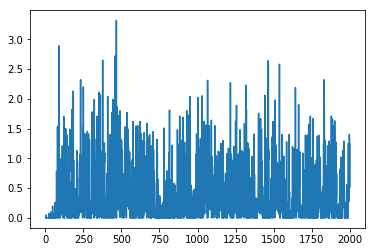

In [30]:
# plot of rewards

import matplotlib.pyplot as plt

plt.plot(range(1,len(scores_history) +1 ), scores_history)

#plt.plot(range(1,len(scores) +1 ), scores)



starts at episode 100 and averages the past 100 episodes


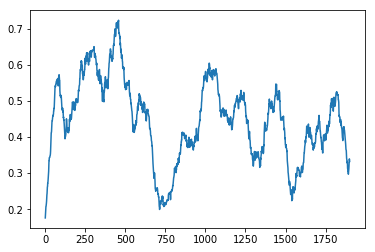

In [31]:
print("starts at episode {} and averages the past {} episodes".format(window_size, window_size))
plt.plot(range(1,len(avg_scores) +1 ), avg_scores)

In [8]:
import importlib
importlib.reload(agent)

<module 'agent' from '/home/workspace/agent.py'>

In [18]:
%autoreload 1

When finished, you can close the environment.

In [19]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 